In [2]:
library(dplyr)
library(ggplot2)
library(cowplot)
library(qvalue)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [4]:
sce = readRDS("/hps/nobackup2/stegle/users/acuomo/endodiff_sce.rds")
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [6]:
df = data.frame(feature = rownames(sce), gene = gsub("_.*","",rownames(sce)))

In [7]:
head(df)

feature                  gene           
1 ENSG00000000003_TSPAN6   ENSG00000000003
2 ENSG00000000419_DPM1     ENSG00000000419
3 ENSG00000000457_SCYL3    ENSG00000000457
4 ENSG00000000460_C1orf112 ENSG00000000460
5 ENSG00000001036_FUCA2    ENSG00000001036
6 ENSG00000001084_GCLC     ENSG00000001084

In [3]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [4]:
crm_file = paste0(revision_folder, "Annas_results_all_common_eqtls.csv")
# crm_file = paste0(revision_folder,"Annas_results_all_common_eqtls_with_Bonferroni.csv")
crm = read.csv(crm_file, row.names=1)

In [5]:
# crm$n_snps = crm$pv_Bonf/crm$pv

In [6]:
head(crm,2)

gene            n_snps chrom pv_raw    snpID           pv
3 ENSG00000250462 909    17    0.3010359 17_28859432_G_A 1 
5 ENSG00000250462 909    17    0.1958365 17_28859670_C_A 1 
  eqtl                           
3 ENSG00000250462-17_28859432_G_A
5 ENSG00000250462-17_28859670_C_A

In [7]:
nrow(crm)
crm_20 = crm[crm$chrom==20,]
nrow(crm_20)

[1] 5238155

[1] 143221

In [8]:
crm20 = inner_join(crm_20,df)
nrow(crm20)
head(crm20,2)

ERROR: Error: `x` and `y` must share the same src, set `copy` = TRUE (may be slow).


In [ ]:
# nrow(crm)
# crm_22 = crm[crm$chrom==22,]
# nrow(crm_22)

In [ ]:
# crm22 = inner_join(crm_22,df)
# nrow(crm22)
# head(crm22,2)

In [ ]:
# fvf = crm22[,c("feature","snpID","chrom")]
fvf = crm20[,c("feature","snpID","chrom")]
head(fvf)

In [ ]:
filename = paste0(revision_folder,"/CRM_interaction_chr20/fvf.csv")
# write.csv(fvf, filename)

In [ ]:
filename = paste0(revision_folder,"/CRM_interaction_chr22/fvf.csv")
# write.csv(fvf, filename)

In [ ]:
#########

In [9]:
length(unique(as.character(crm_22$gene)))
nrow(crm_22)

ERROR: Error in unique(as.character(crm_22$gene)): object 'crm_22' not found


In [43]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
nrow(crm_int)
head(crm_int,2)

[1] 342420

gene            n_snps chrom pv_raw    snpID          
0 ENSG00000250479 10     22    0.3439653 22_24071877_G_A
1 ENSG00000250479 10     22    0.4098352 22_24072256_G_C

In [44]:
unique(as.character(crm_int$chrom))

[1] "22" "20" "21"

In [45]:
length(unique(as.character(crm_int$gene)))

[1] 641

In [46]:
crm_assoc = crm[crm$chrom %in% c(20,21,22),]

In [47]:
length(unique(as.character(crm_int$gene)))/length(unique(as.character(crm_assoc$gene)))
nrow(crm_int)/nrow(crm_assoc)

[1] 0.9953416

[1] 0.99402

In [48]:
length(unique(as.character(crm_int[crm_int$chrom == 20, ]$gene)))
length(unique(as.character(crm_int[crm_int$chrom == 21, ]$gene)))
length(unique(as.character(crm_int[crm_int$chrom == 22, ]$gene)))

[1] 277

[1] 93

[1] 271

In [39]:
df_plot = inner_join(crm_assoc, crm_int, by=c("snpID","gene"), suffix=c(".assoc",".int"))

In [40]:
nrow(df_plot)

[1] 334861

In [41]:
head(df_plot)

gene            n_snps.assoc chrom.assoc pv_raw.assoc snpID           pv
1 ENSG00000100206 639          22          0.4846768    22_38815543_G_T 1 
2 ENSG00000100206 639          22          0.5735132    22_38815767_C_T 1 
3 ENSG00000100206 639          22          0.8756466    22_38816059_T_C 1 
4 ENSG00000100206 639          22          0.1460246    22_38816351_G_A 1 
5 ENSG00000100206 639          22          0.2546127    22_38817047_A_G 1 
6 ENSG00000100206 639          22          0.1834585    22_38817105_C_T 1 
  eqtl                            n_snps.int chrom.int pv_raw.int
1 ENSG00000100206-22_38815543_G_T 10         22        0.6147924 
2 ENSG00000100206-22_38815767_C_T 10         22        0.6793908 
3 ENSG00000100206-22_38816059_T_C 10         22        0.6799526 
4 ENSG00000100206-22_38816351_G_A 10         22        0.4727467 
5 ENSG00000100206-22_38817047_A_G 10         22        0.9916579 
6 ENSG00000100206-22_38817105_C_T 10         22        0.9288681

In [42]:
cor.test(-log10(df_plot$pv_raw.assoc),-log10(df_plot$pv_raw.int))


	Pearson's product-moment correlation

data:  -log10(df_plot$pv_raw.assoc) and -log10(df_plot$pv_raw.int)
t = 198.08, df = 334859, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3208141 0.3268777
sample estimates:
      cor 
0.3238492 


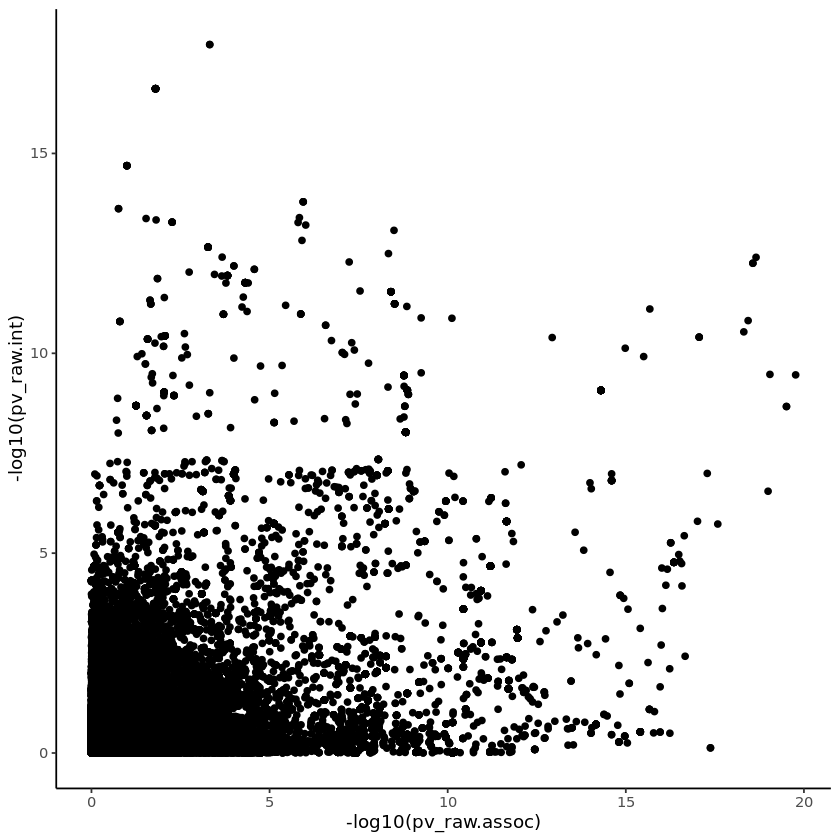

In [29]:
p = ggplot(df_plot, aes(x=-log10(pv_raw.assoc),y=-log10(pv_raw.int))) + geom_point()
p + theme_classic()

In [30]:
df_plot$pos = as.numeric(t(matrix(unlist(strsplit(as.character(df_plot$snpID),"_")),ncol=nrow(df_plot),nrow=4))[,2])
# head(df_plot$pos)

In [31]:
## sign for int but not for assoc

In [32]:
genes = unique(as.character(df_plot[(-log10(df_plot$pv_raw.int)>4) & (-log10(df_plot$pv_raw.assoc)<2),"gene"]))
length(genes)
genes

[1] 42

[1] "ENSG00000170373" "ENSG00000196476" "ENSG00000133466" "ENSG00000100362"
 [5] "ENSG00000101189" "ENSG00000125851" "ENSG00000196562" "ENSG00000100122"
 [9] "ENSG00000172296" "ENSG00000172264" "ENSG00000100221" "ENSG00000101084"
[13] "ENSG00000160282" "ENSG00000124193" "ENSG00000089006" "ENSG00000185437"
[17] "ENSG00000061656" "ENSG00000088305" "ENSG00000160285" "ENSG00000184113"
[21] "ENSG00000198276" "ENSG00000124226" "ENSG00000101198" "ENSG00000184470"
[25] "ENSG00000183579" "ENSG00000087460" "ENSG00000101144" "ENSG00000100031"
[29] "ENSG00000203883" "ENSG00000100276" "ENSG00000128294" "ENSG00000184809"
[33] "ENSG00000128394" "ENSG00000100316" "ENSG00000128335" "ENSG00000214076"
[37] "ENSG00000183486" "ENSG00000133433" "ENSG00000184787" "ENSG00000099984"
[41] "ENSG00000100416" "ENSG00000183421"

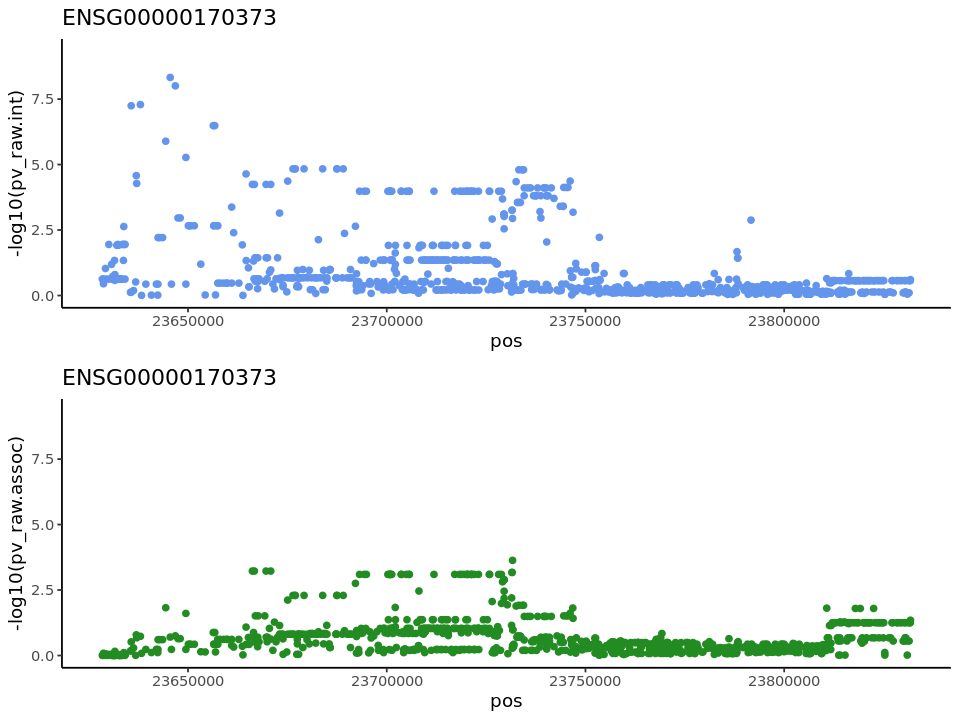

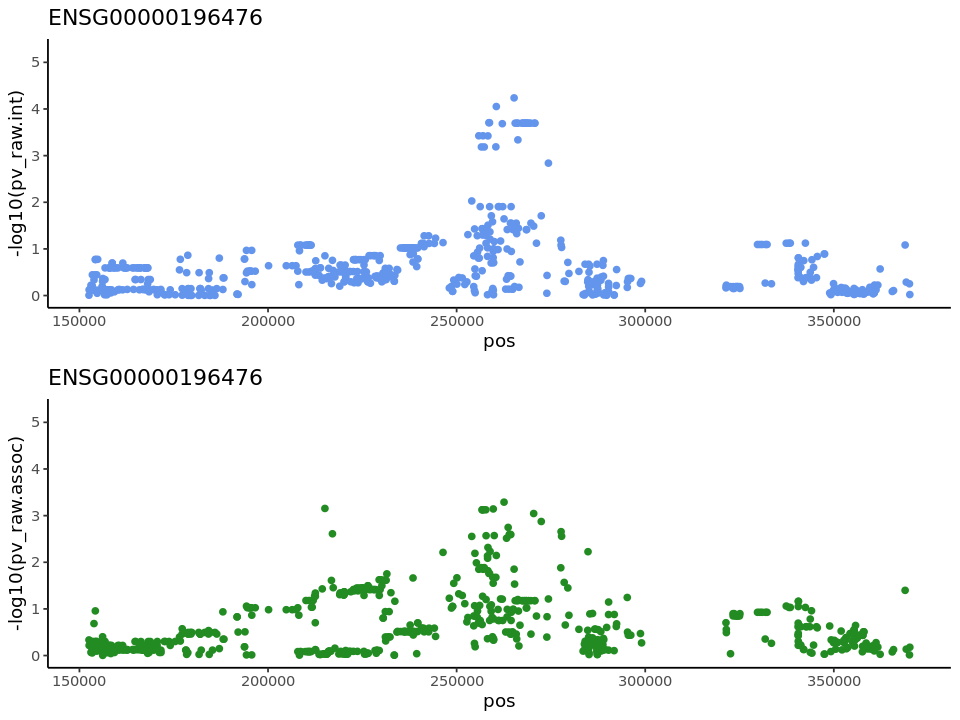

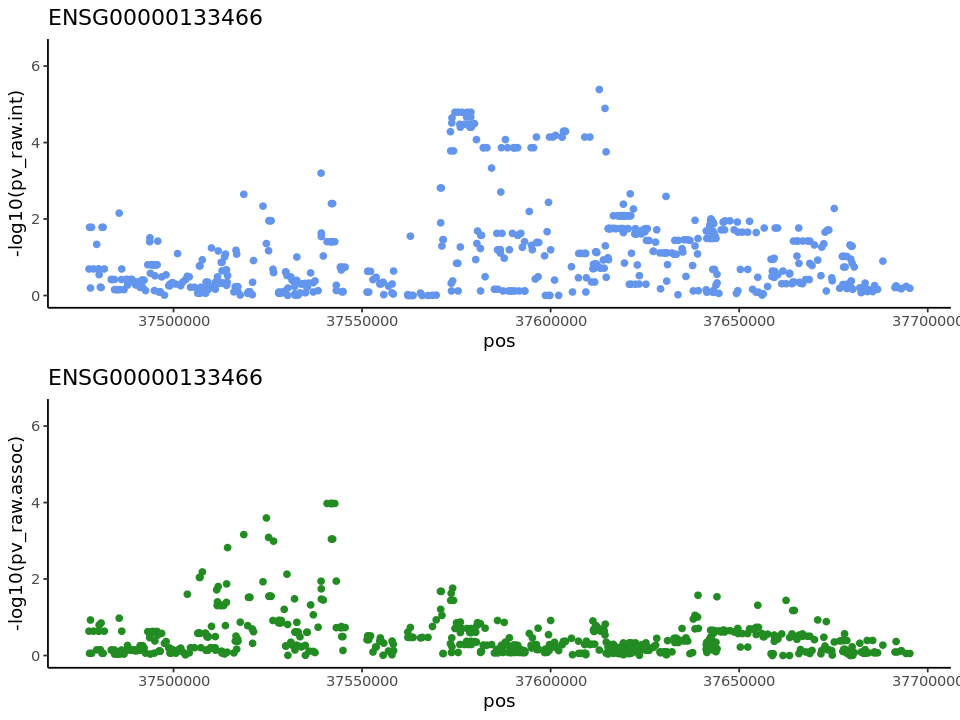

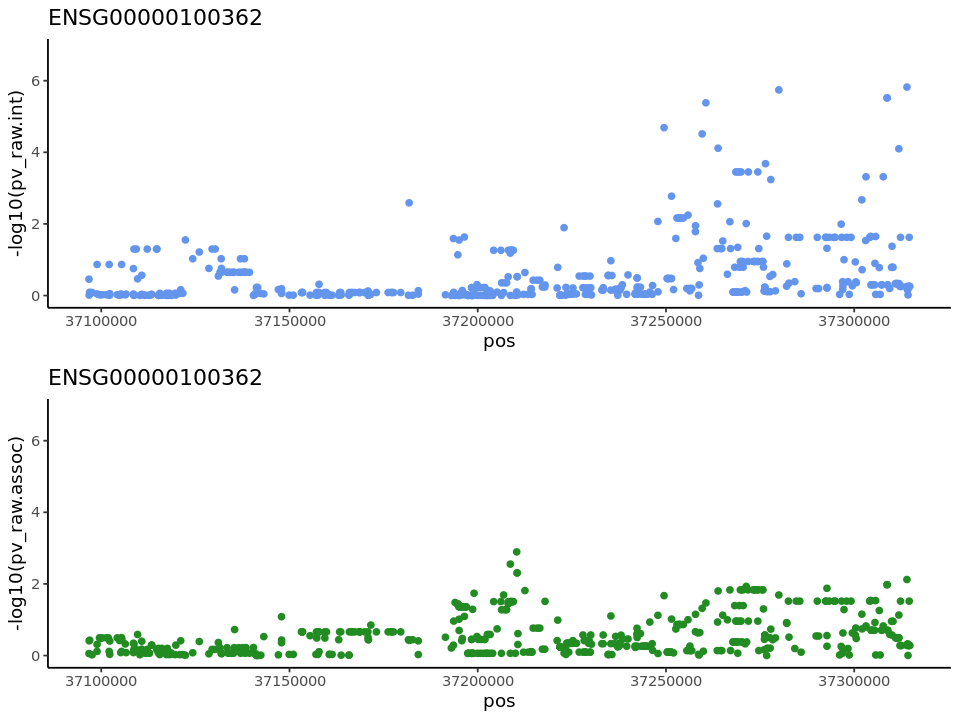

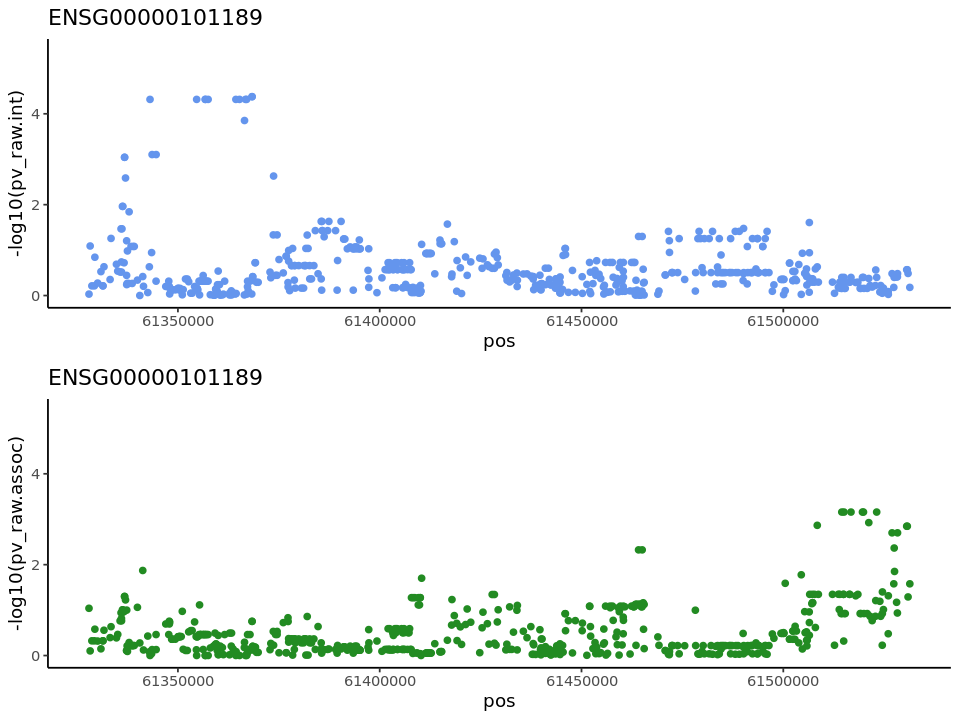

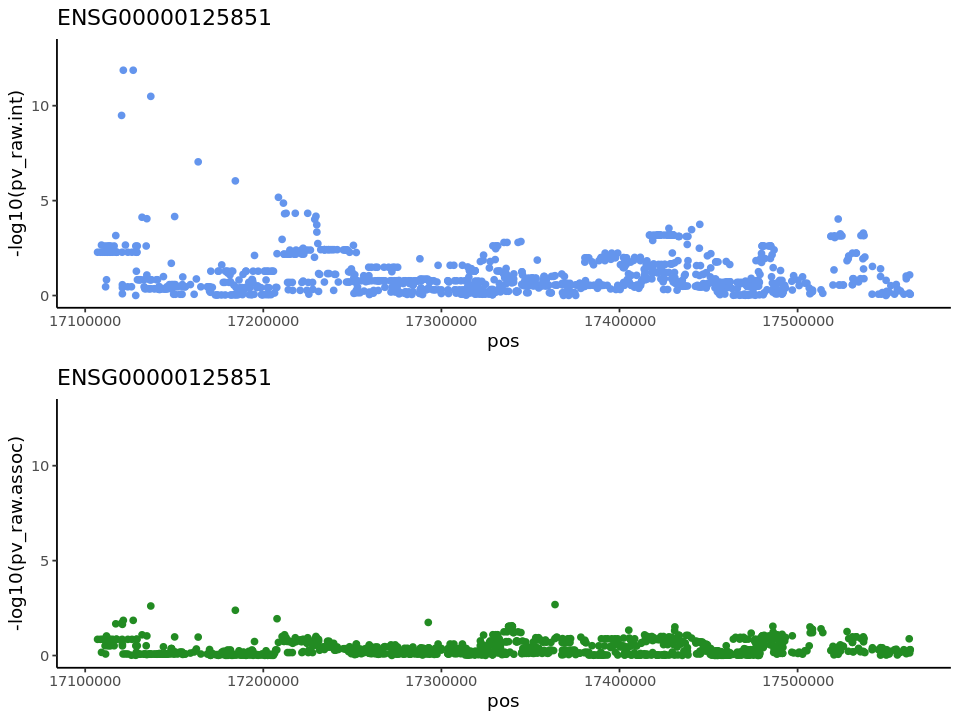

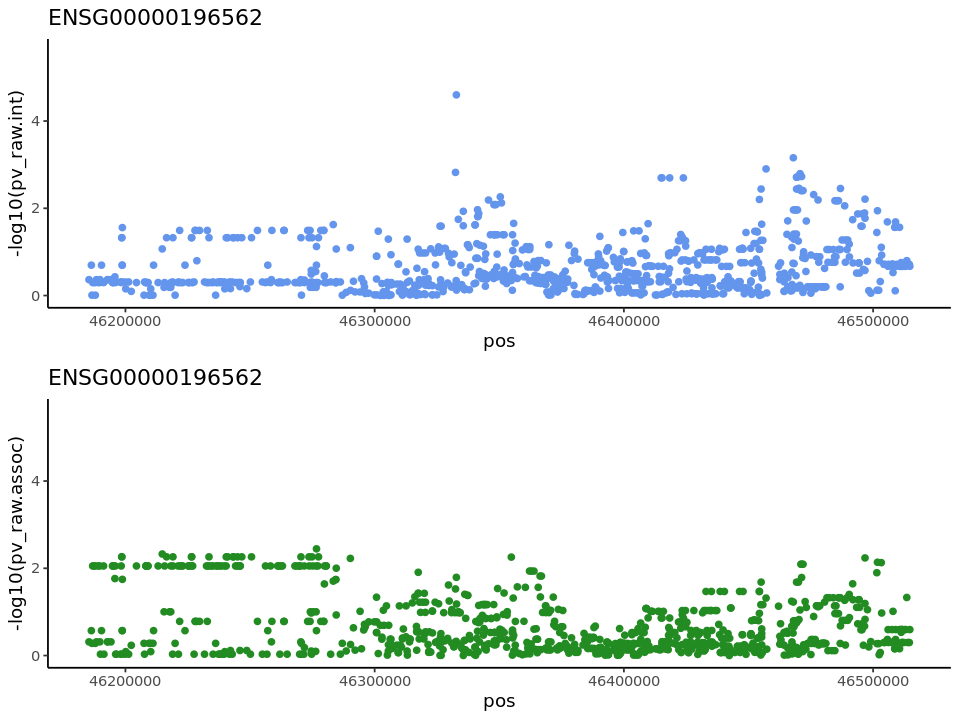

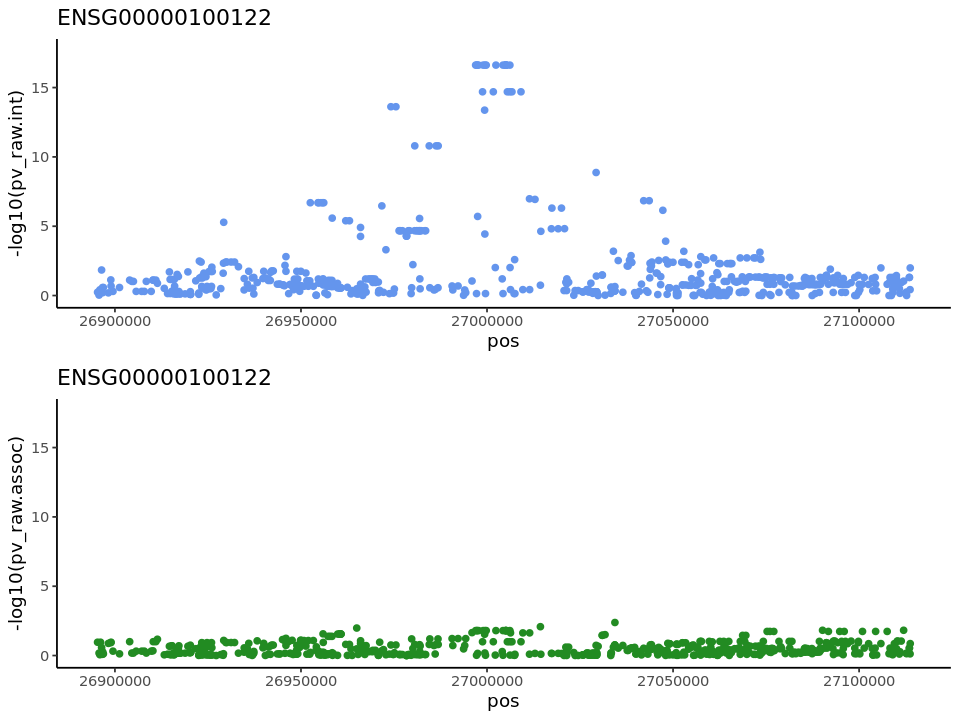

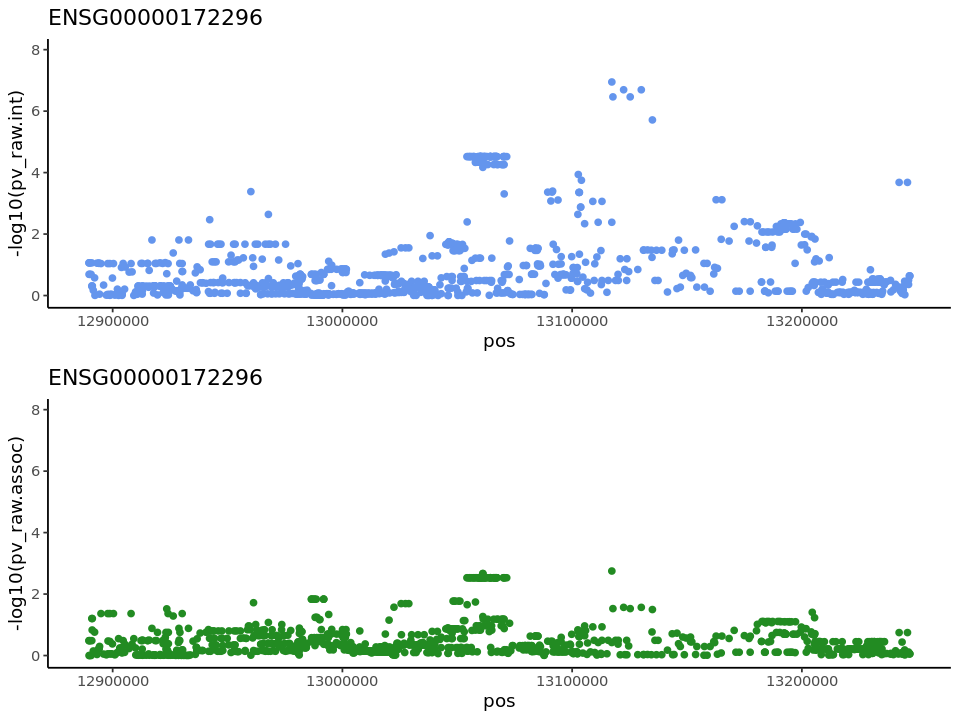

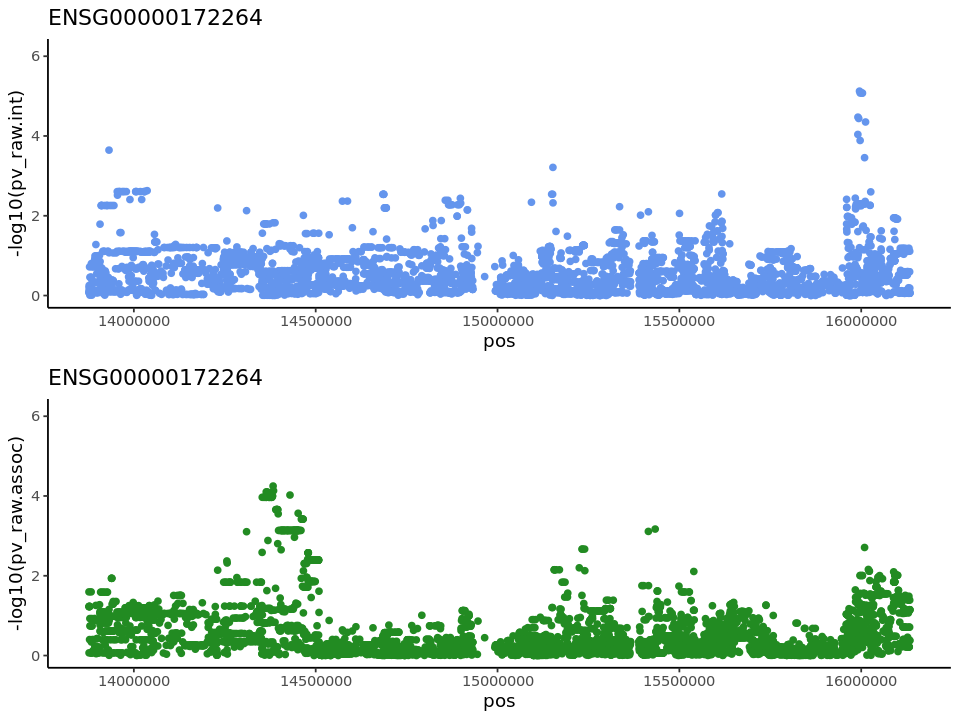

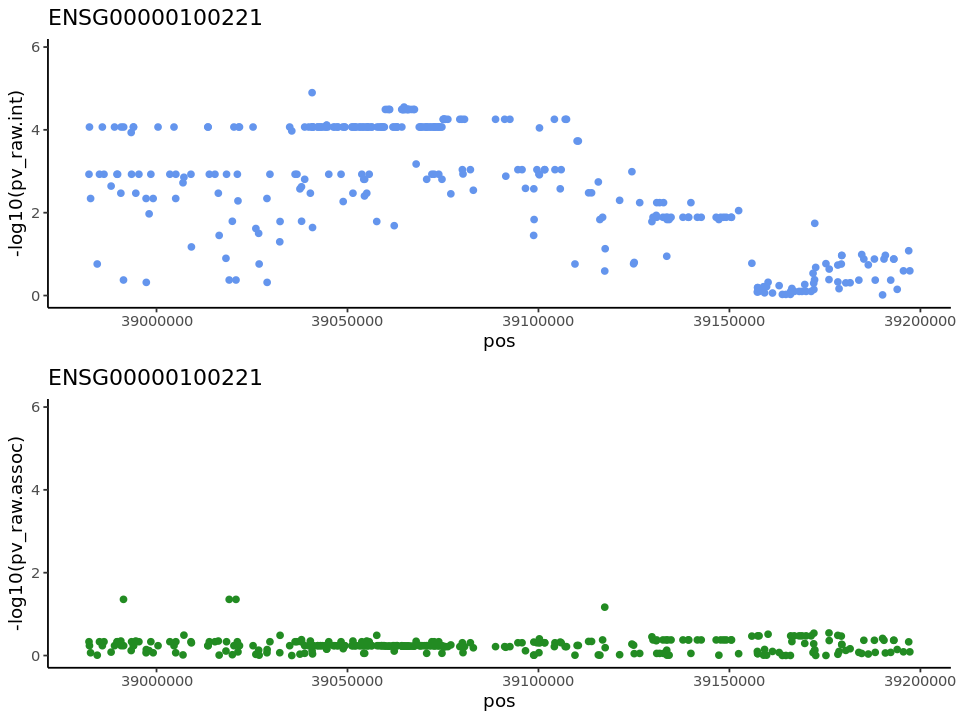

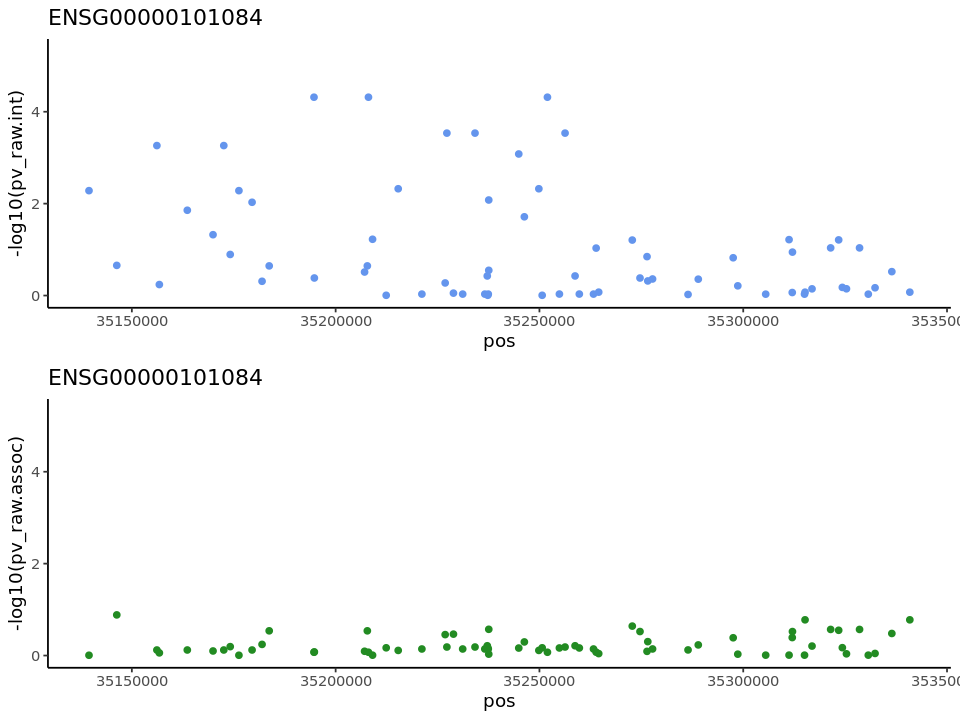

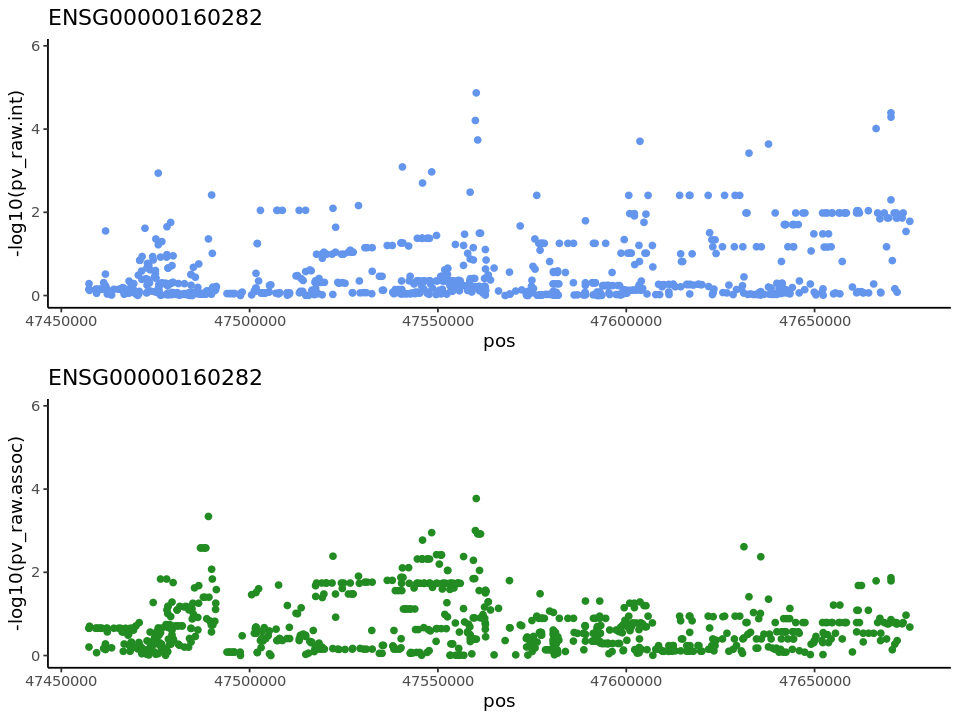

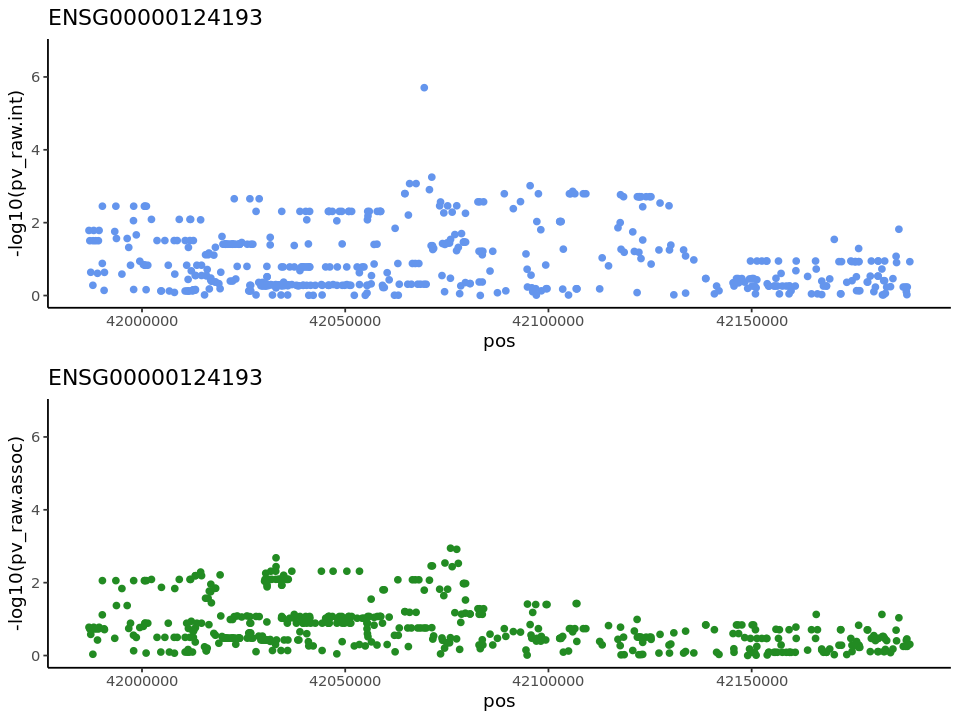

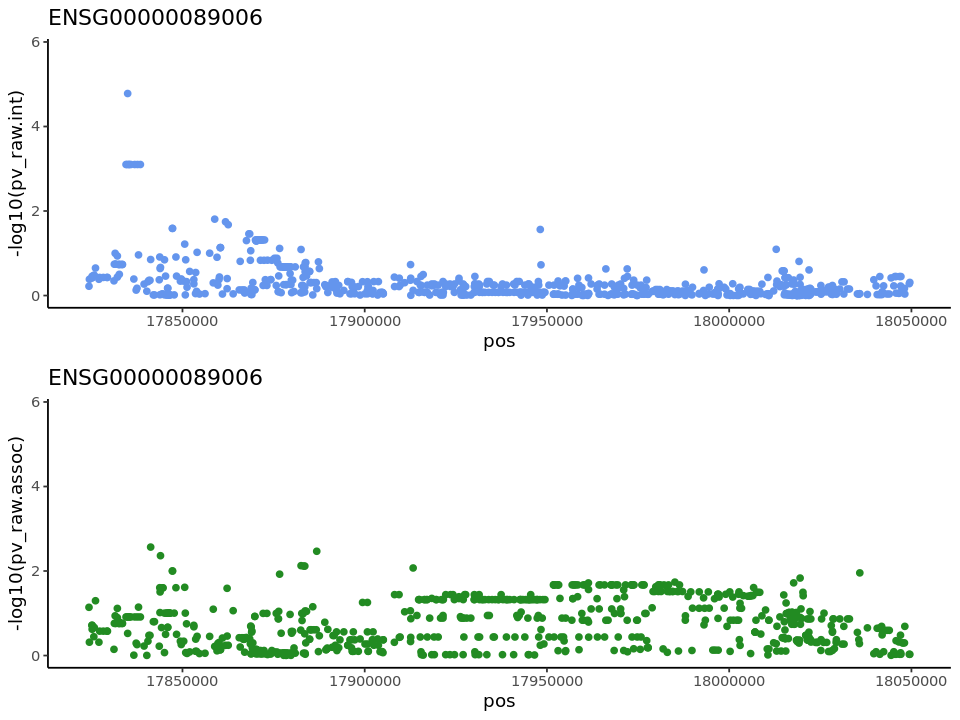

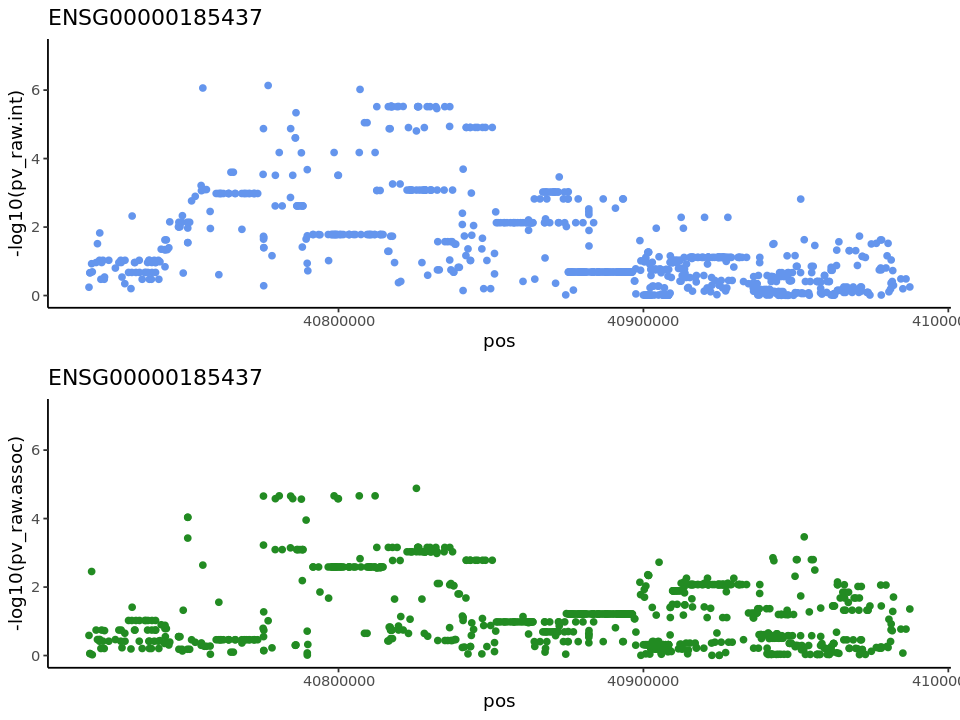

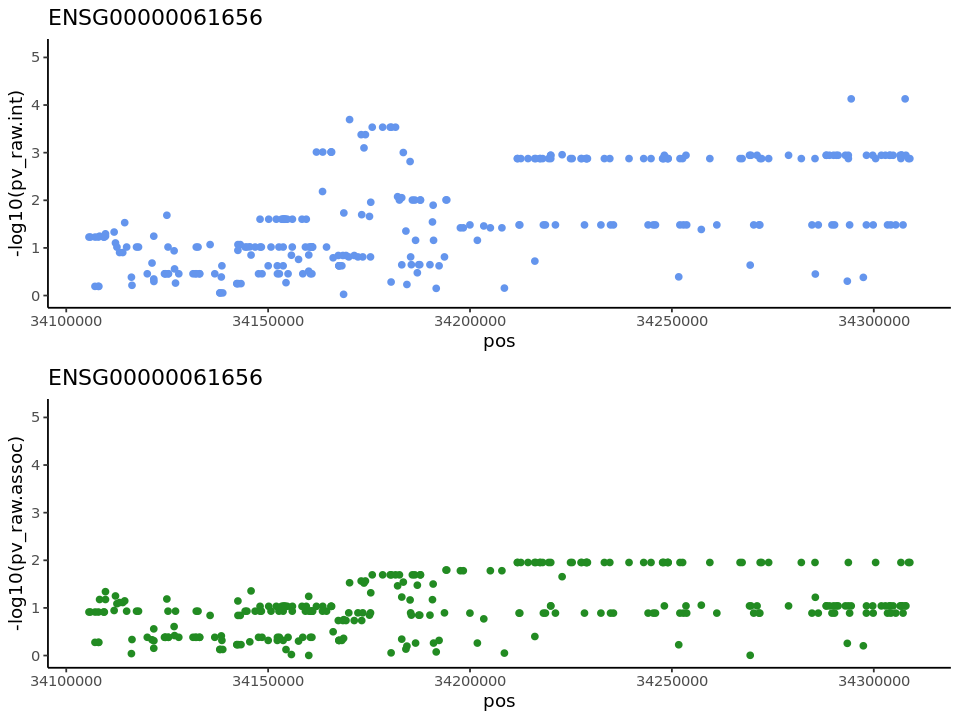

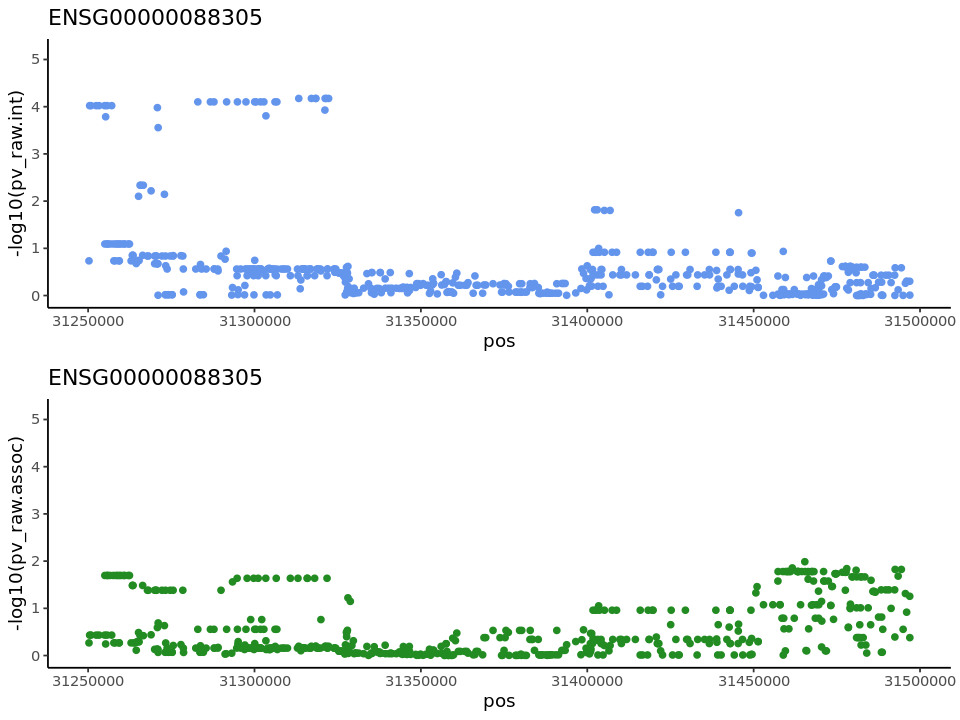

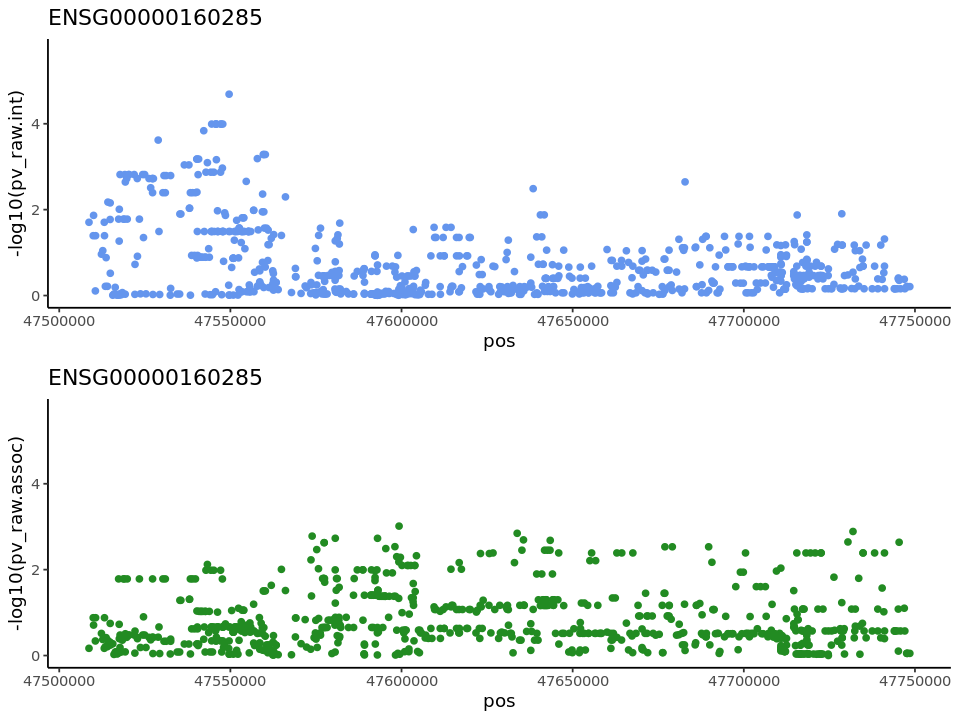

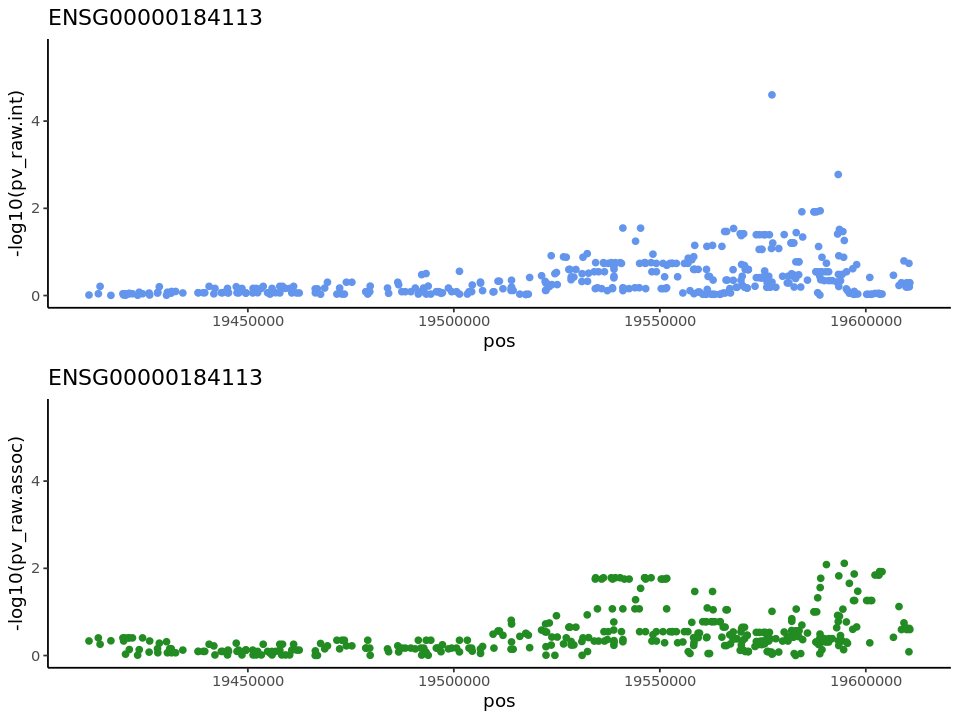

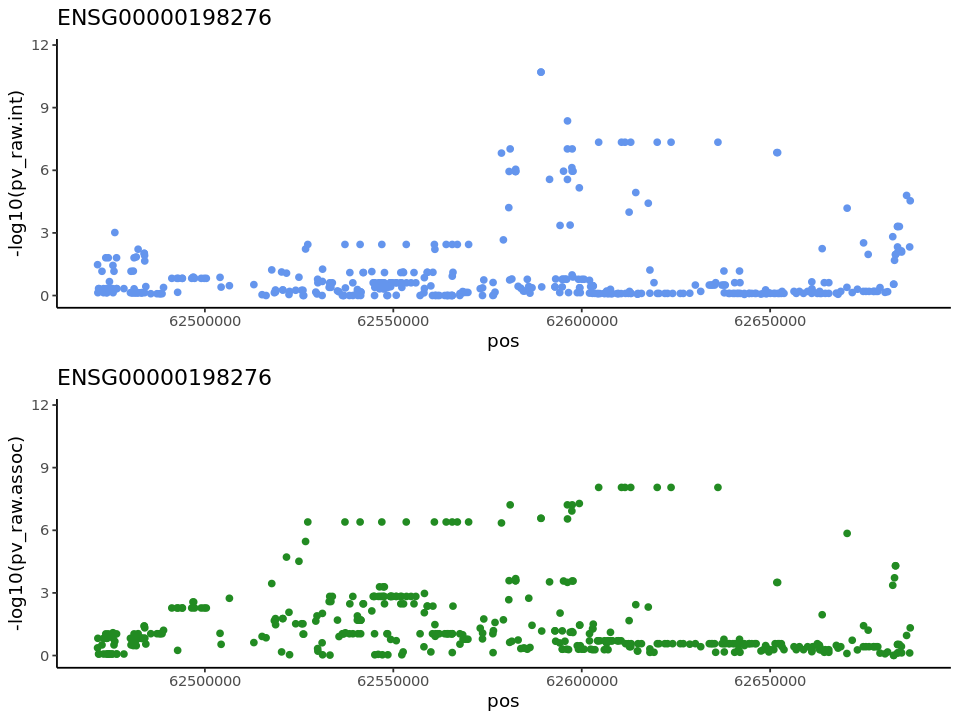

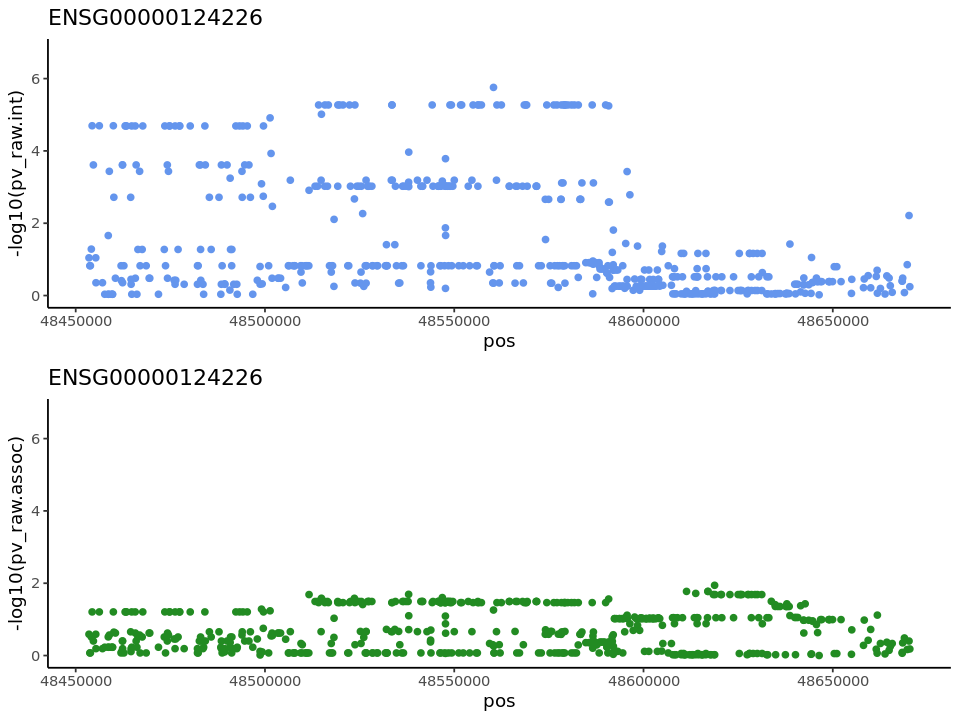

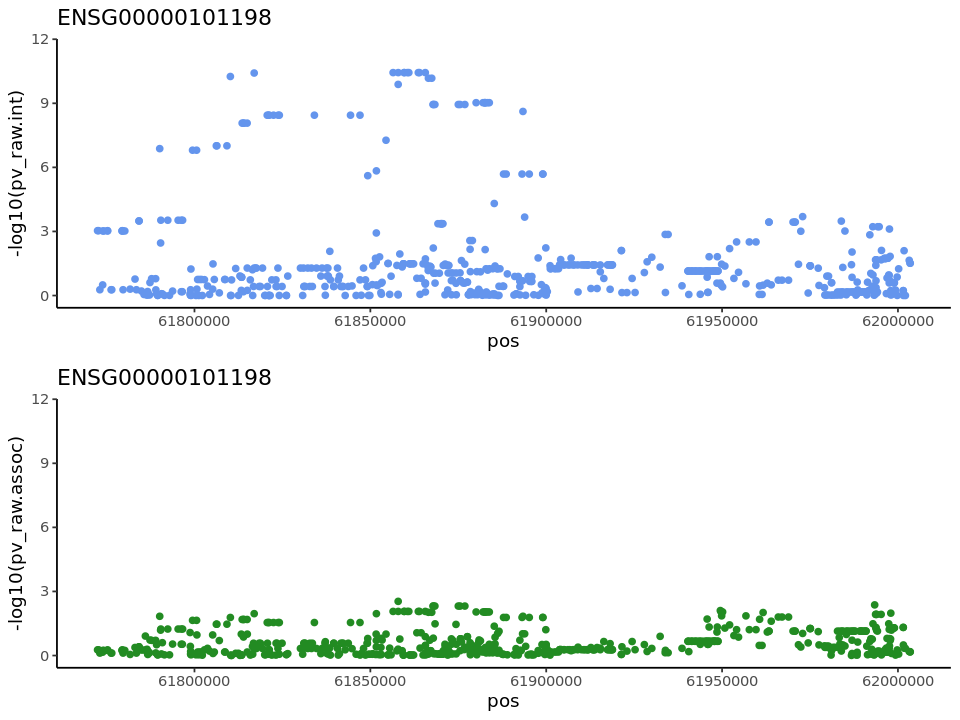

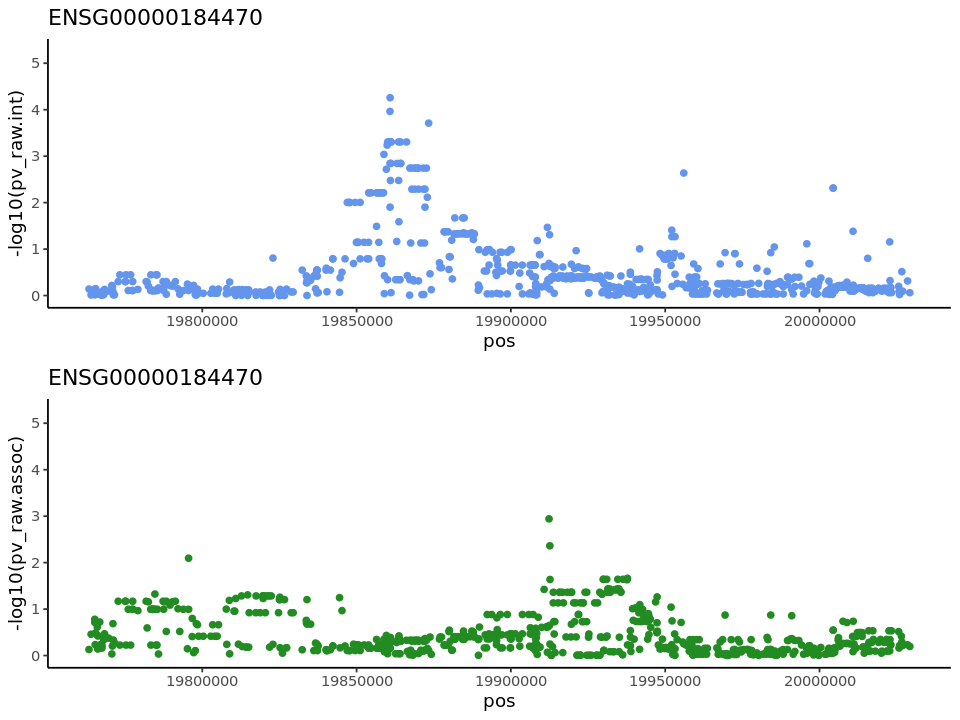

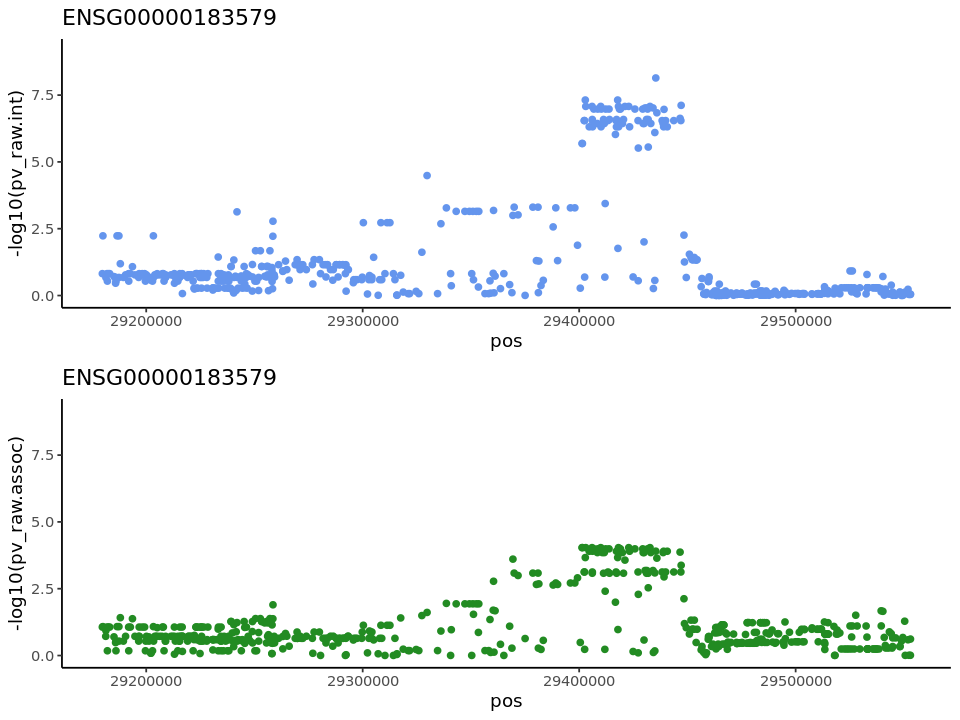

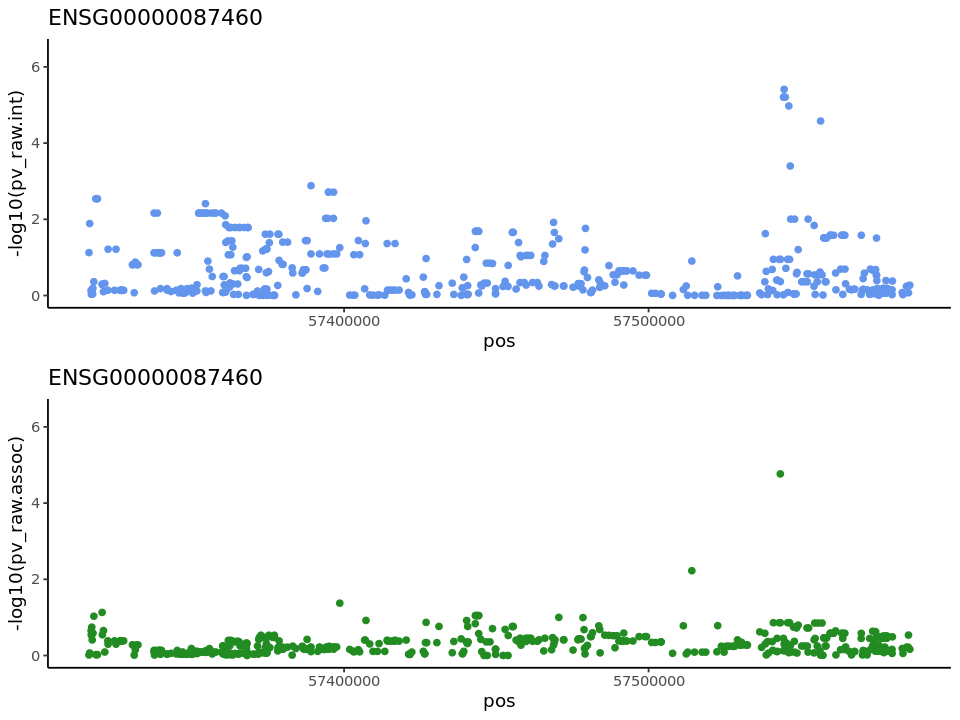

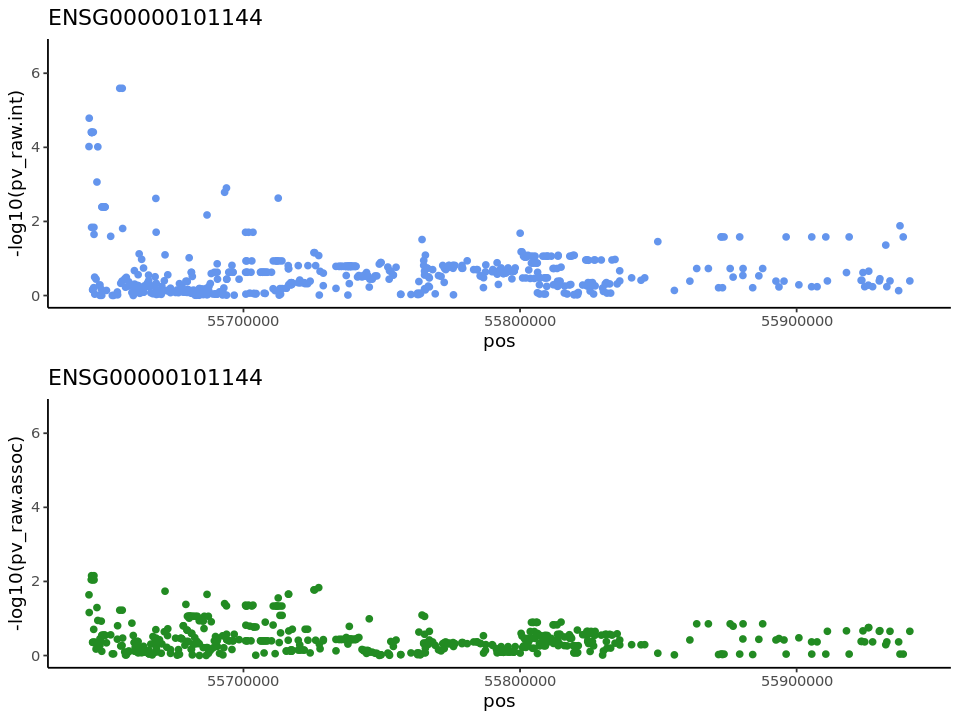

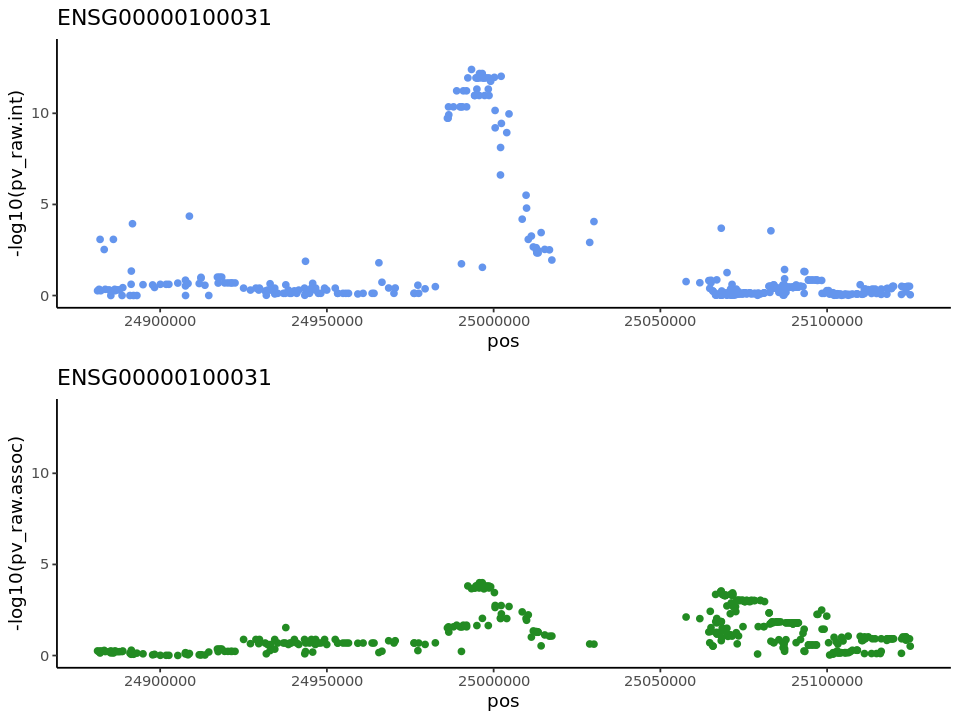

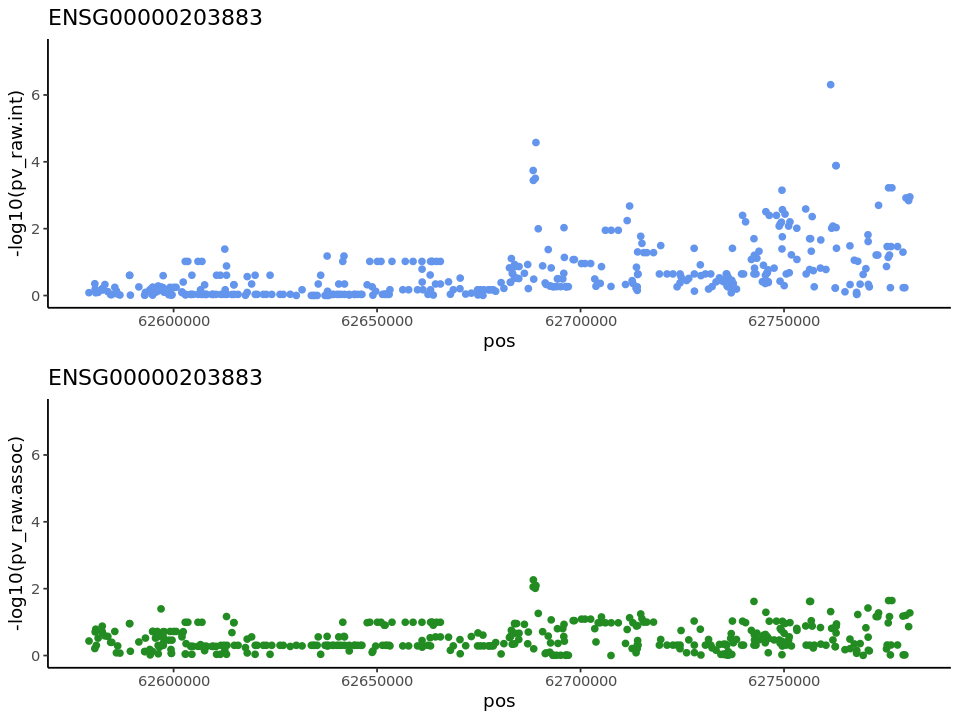

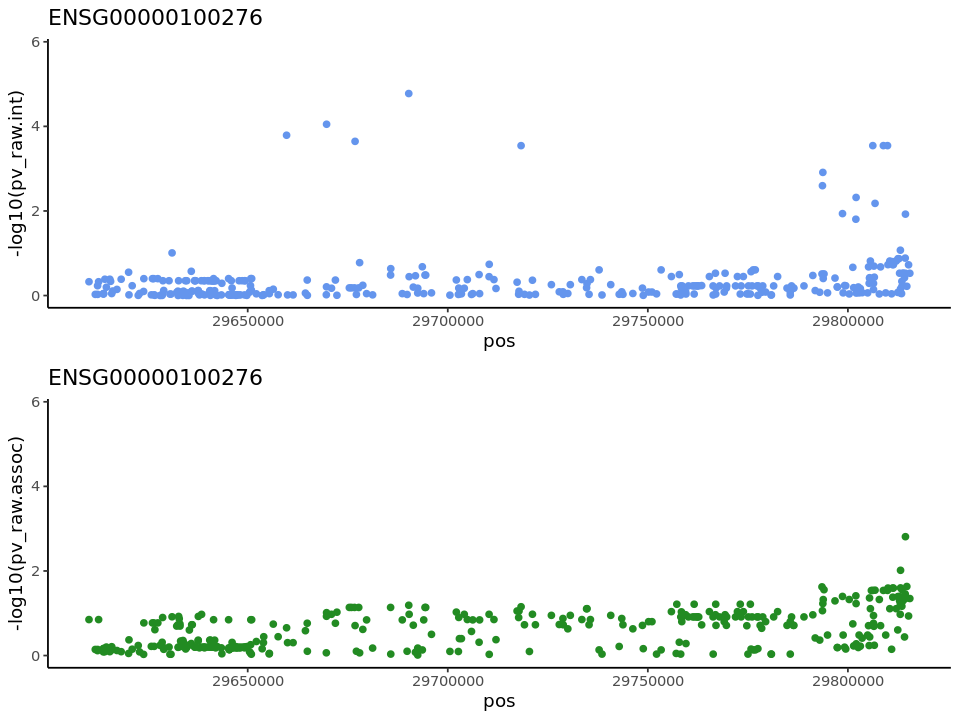

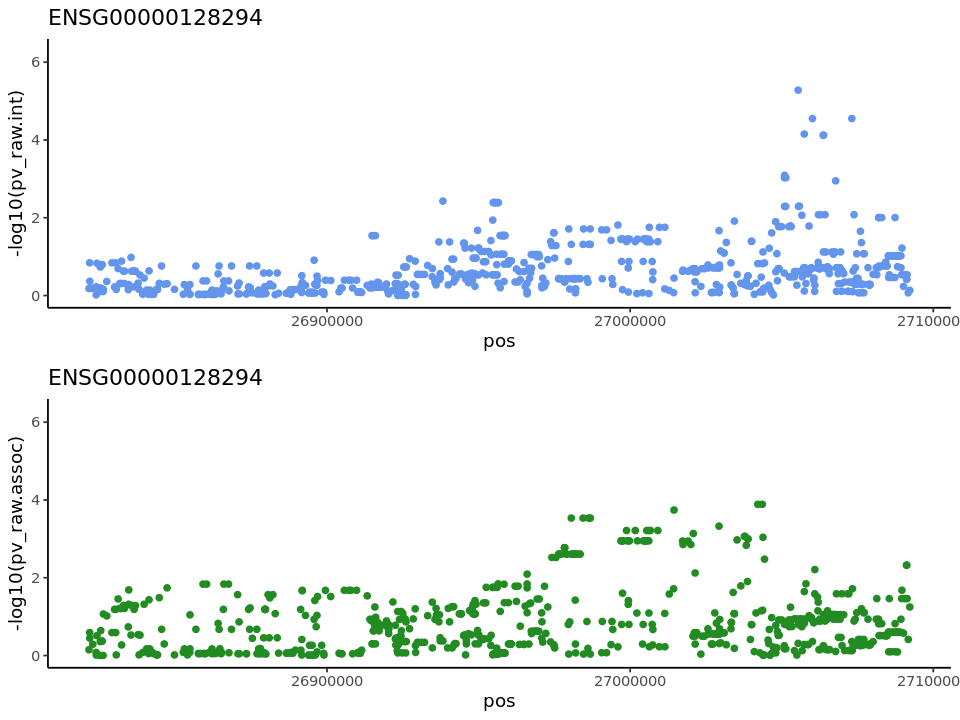

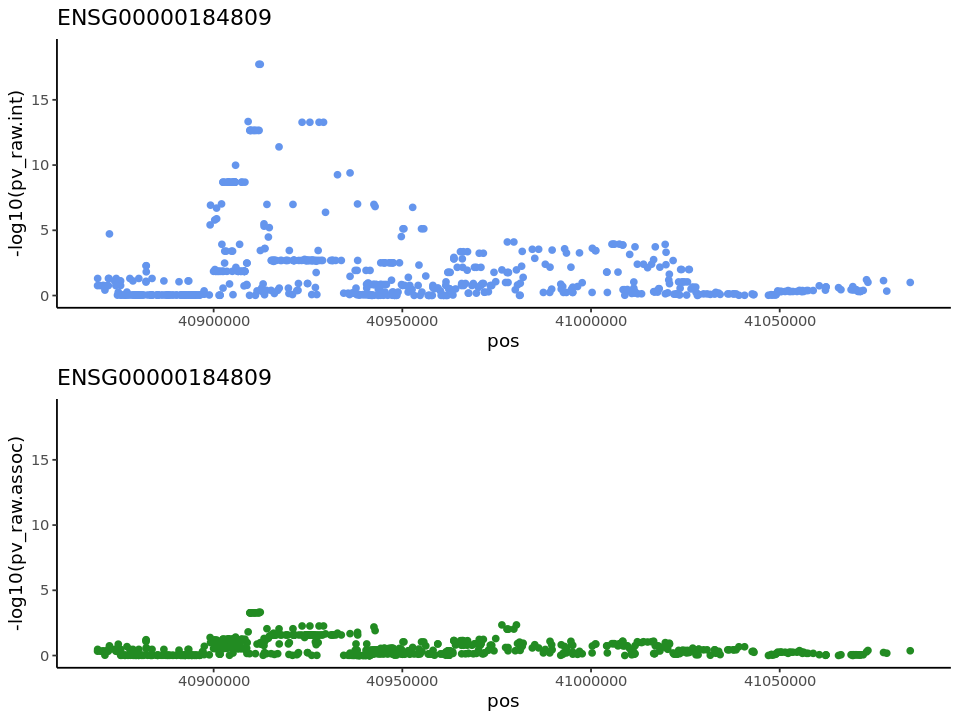

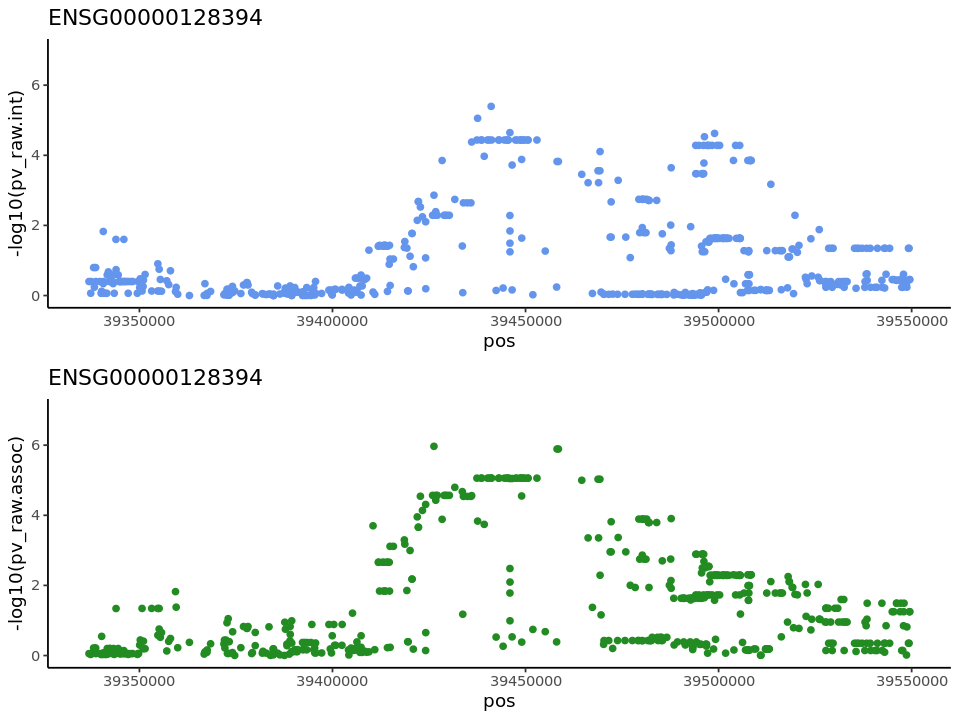

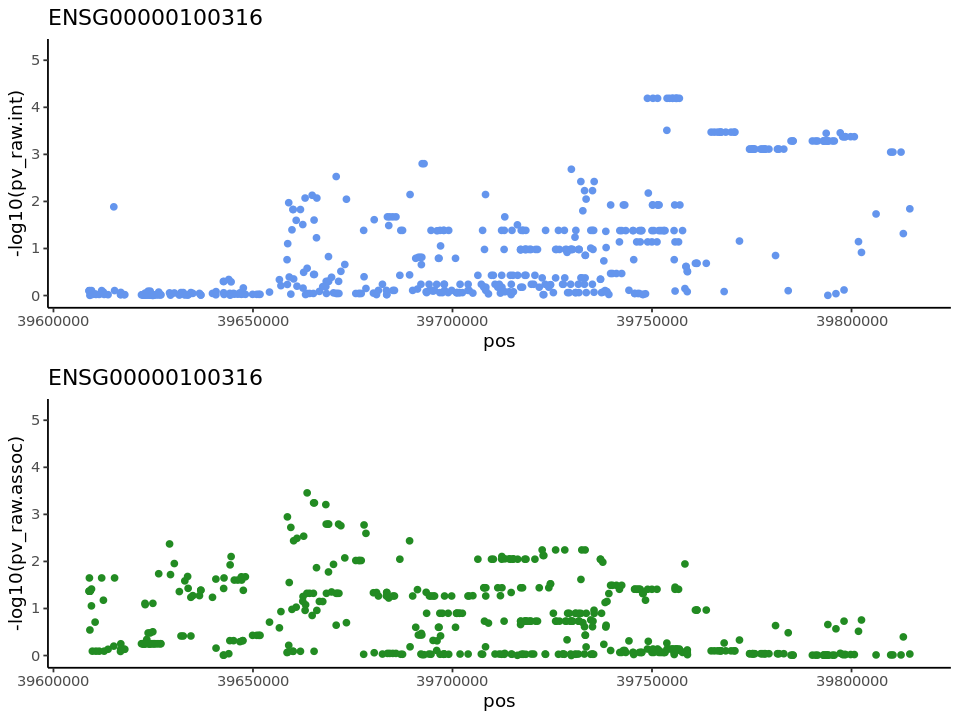

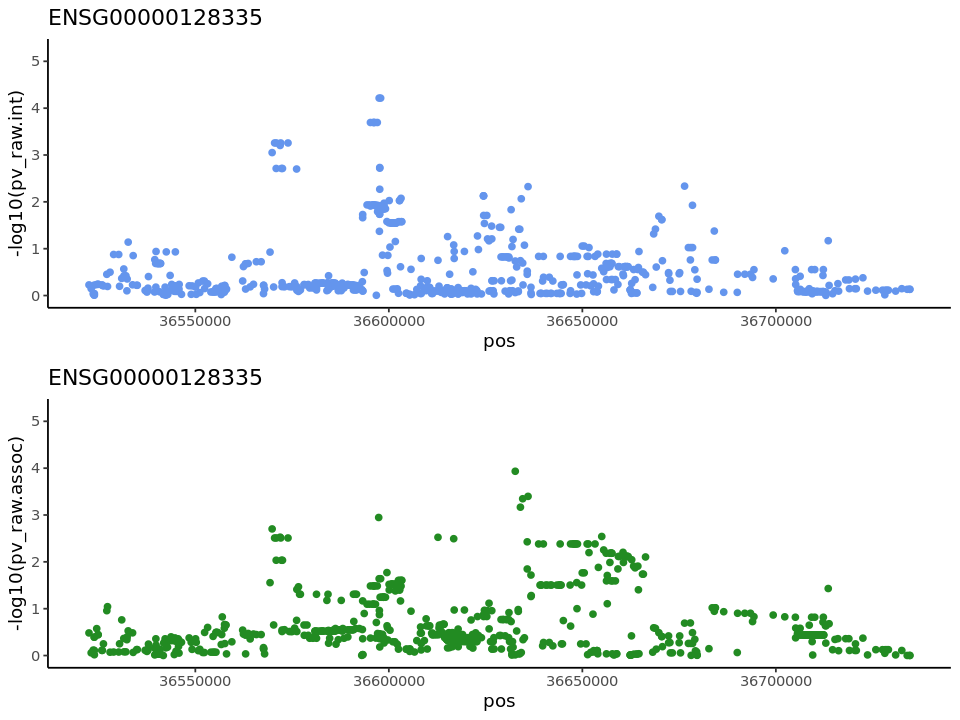

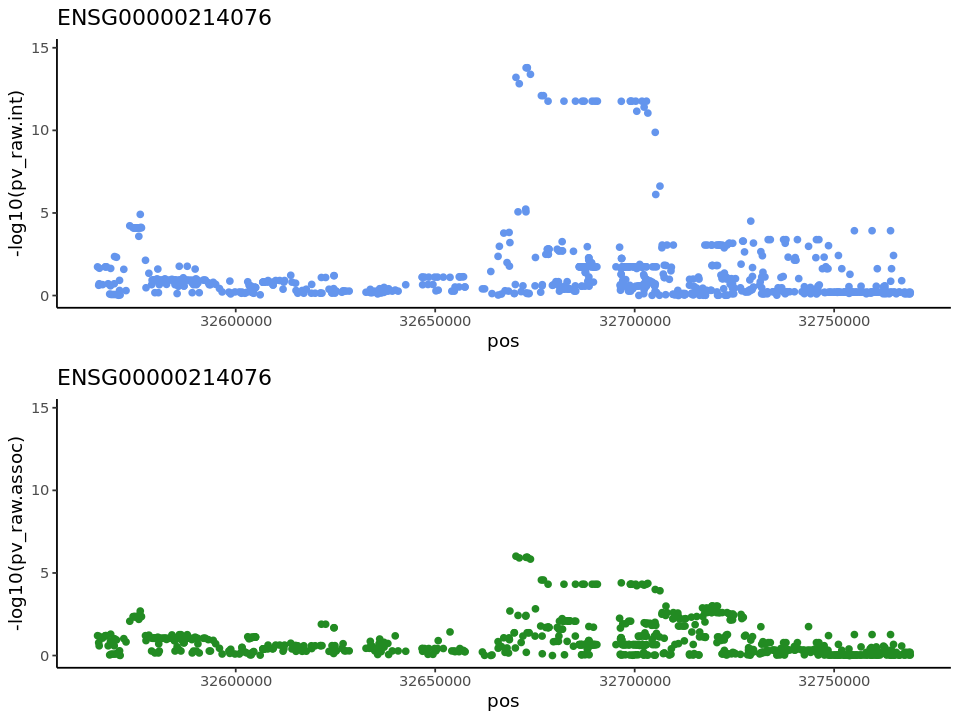

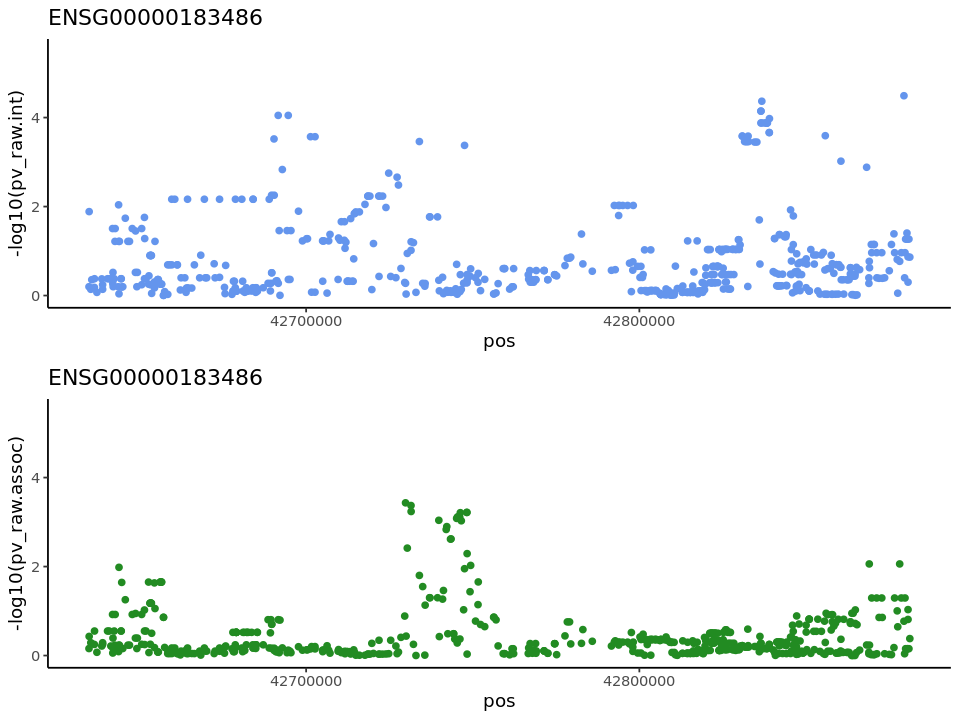

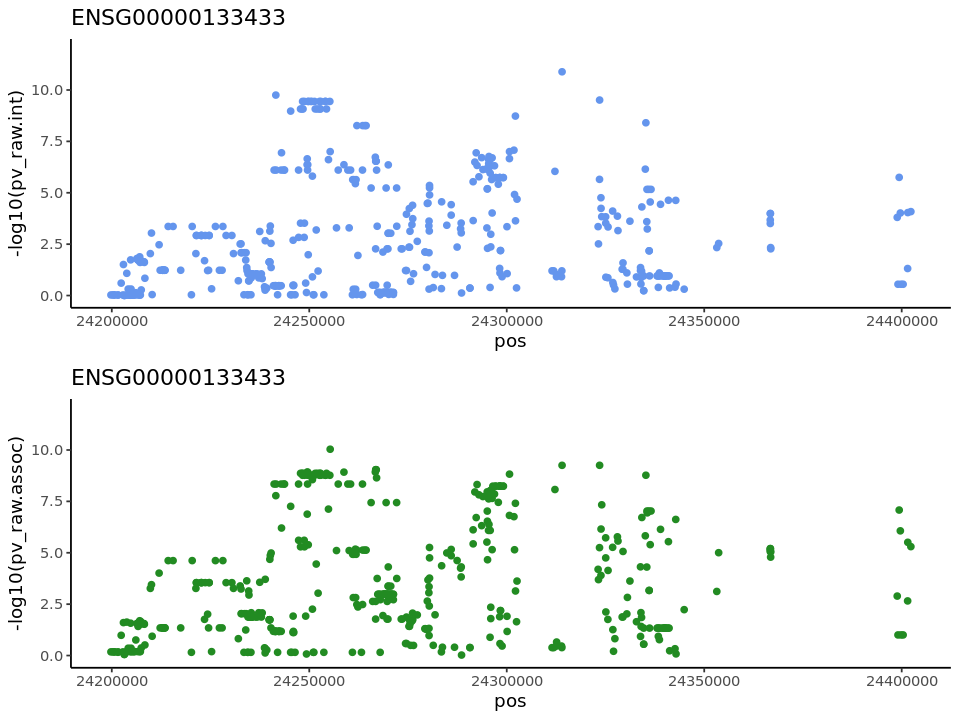

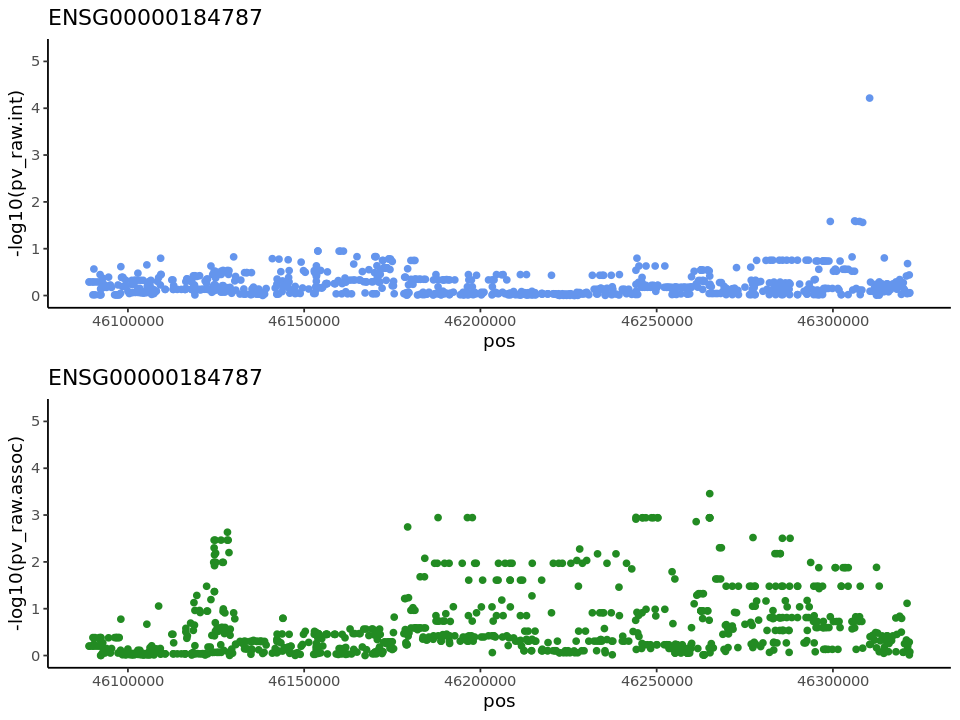

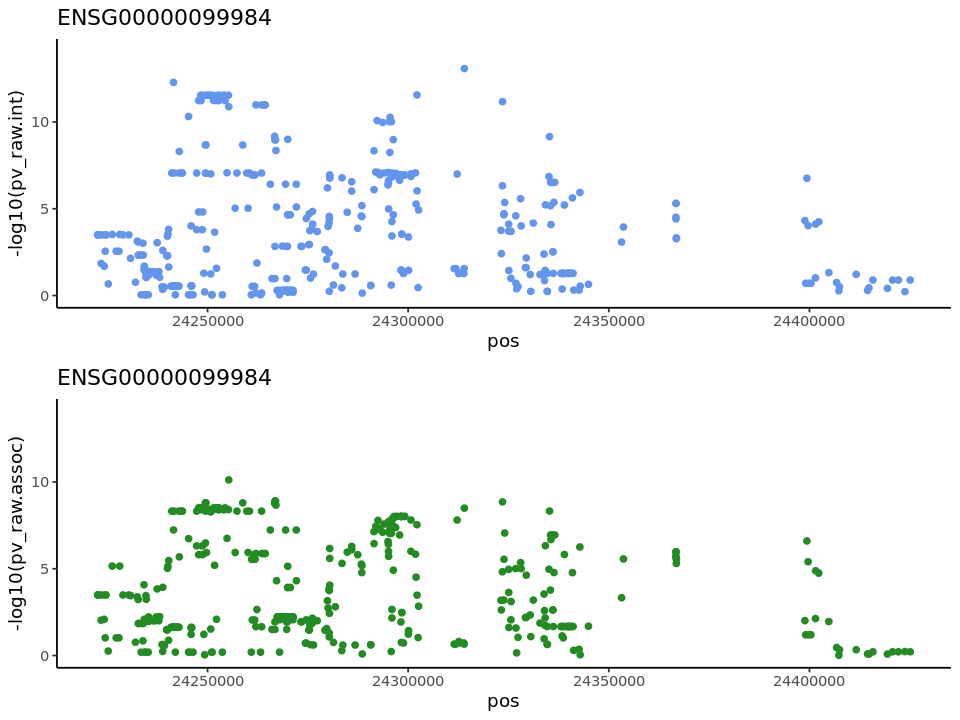

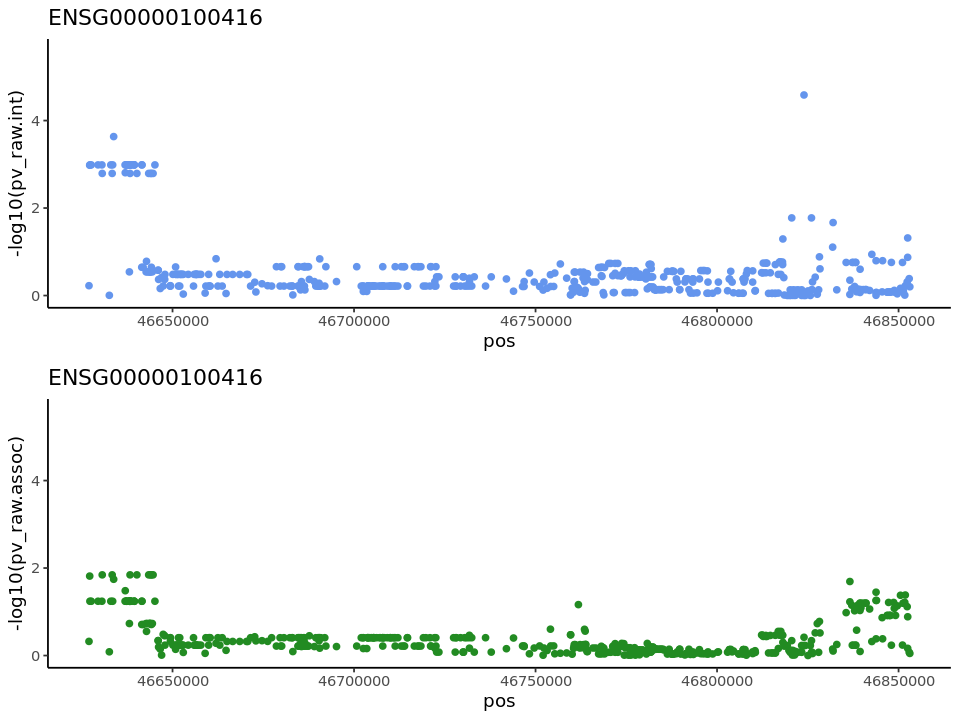

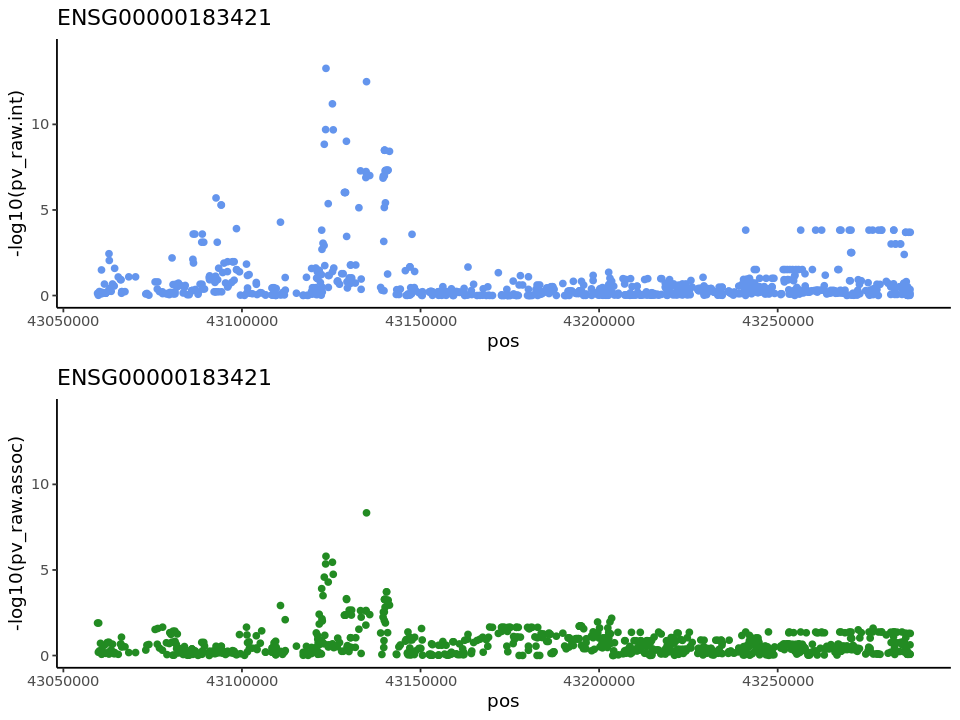

In [33]:
options(repr.plot.width = 8, repr.plot.height = 6)
for (gene in genes){
    df = df_plot[df_plot$gene == gene,]
    p = ggplot(df, aes(x = pos, y = -log10(pv_raw.int))) + geom_point(col="cornflowerblue") 
    p1 = p + theme_classic() + ggtitle(gene)
    p = ggplot(df, aes(x = pos, y = -log10(pv_raw.assoc))) + geom_point(col="forestgreen") 
    p2 = p + theme_classic() + ggtitle(gene)
    m = -log10(min(min(df$pv_raw.int),min(df$pv_raw.assoc)))+1
    p1 = p1 + ylim(c(0,m))
    p2 = p2 + ylim(c(0,m))
    print(plot_grid(p1,p2,ncol=1))
}

In [ ]:
## sign for assoc but not for int

In [21]:
genes = unique(as.character(df_plot[(-log10(df_plot$pv_raw.assoc)>8) & (-log10(df_plot$pv_raw.int)<2),"gene"]))
genes

[1] "ENSG00000184674" "ENSG00000100410" "ENSG00000215012" "ENSG00000093072"
[5] "ENSG00000196236" "ENSG00000100429" "ENSG00000189306" "ENSG00000100417"
[9] "ENSG00000100376"

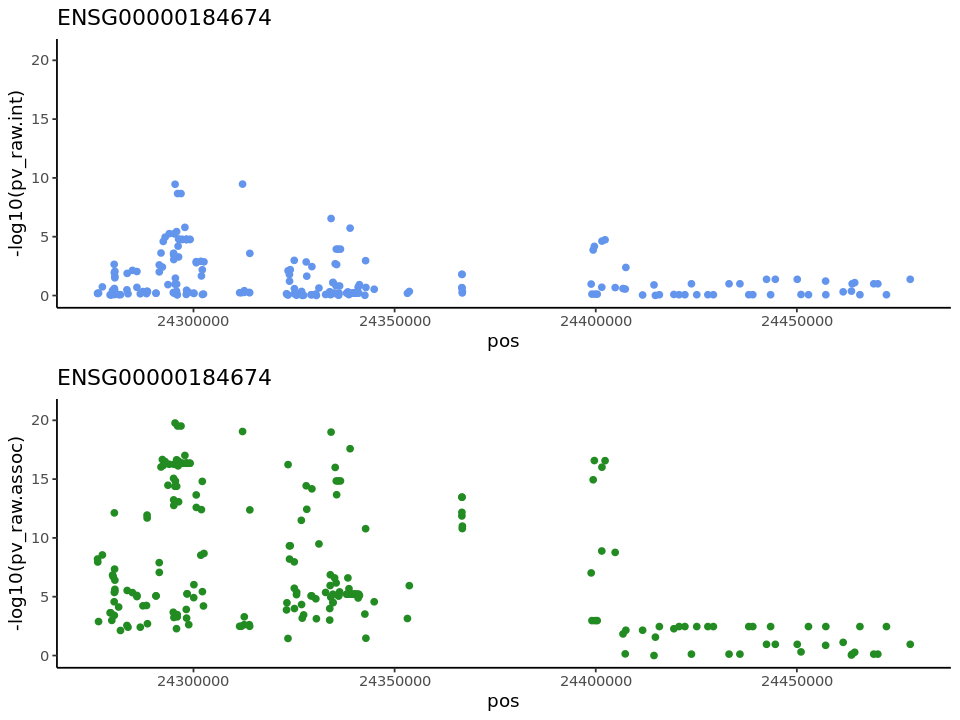

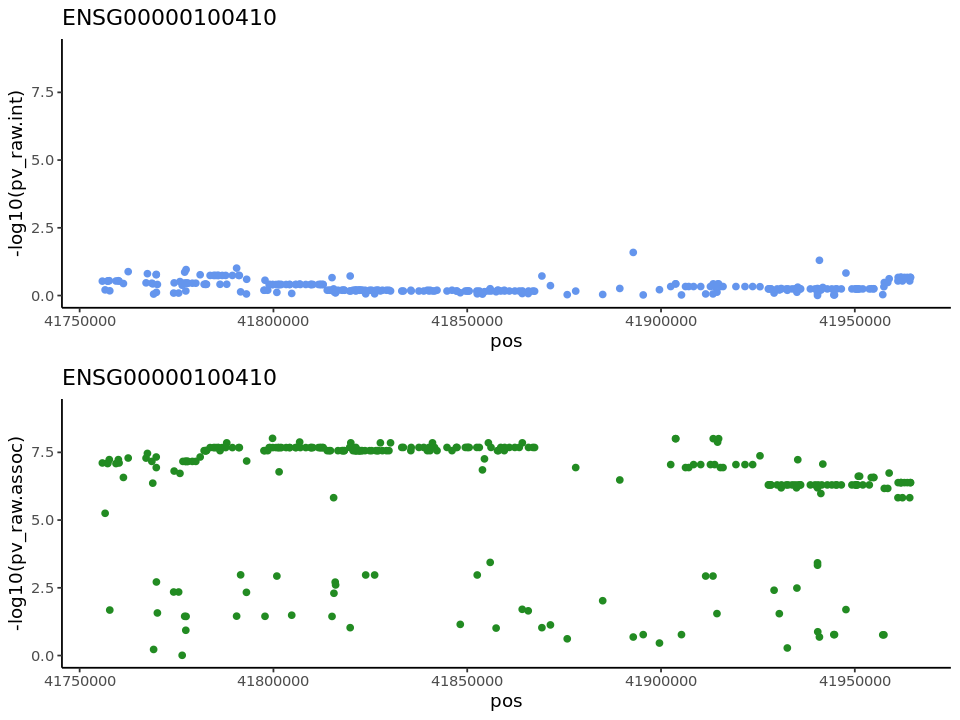

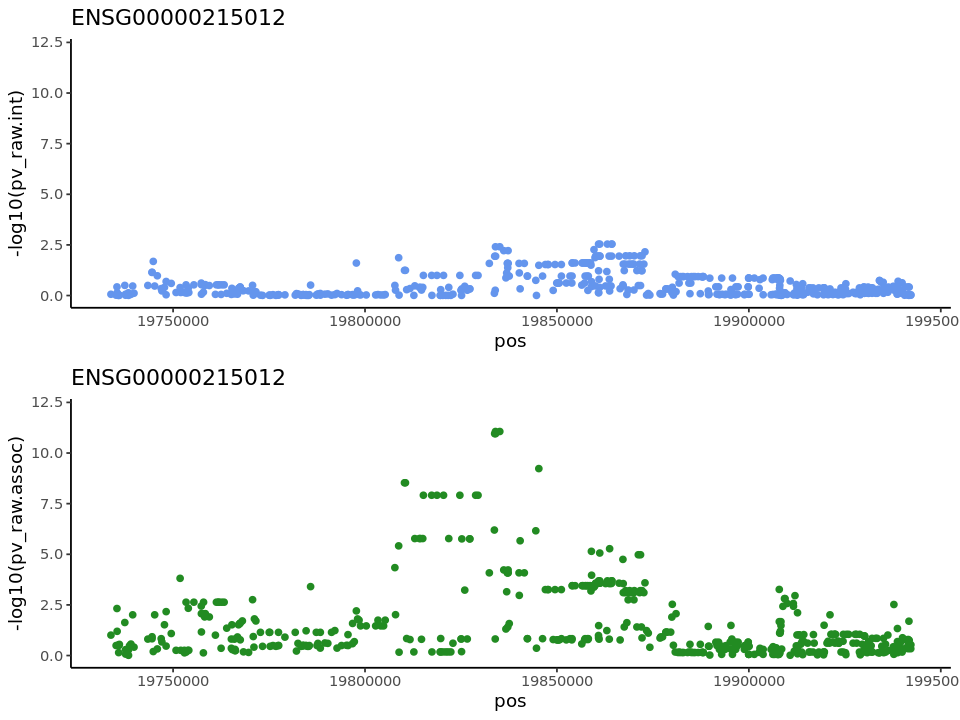

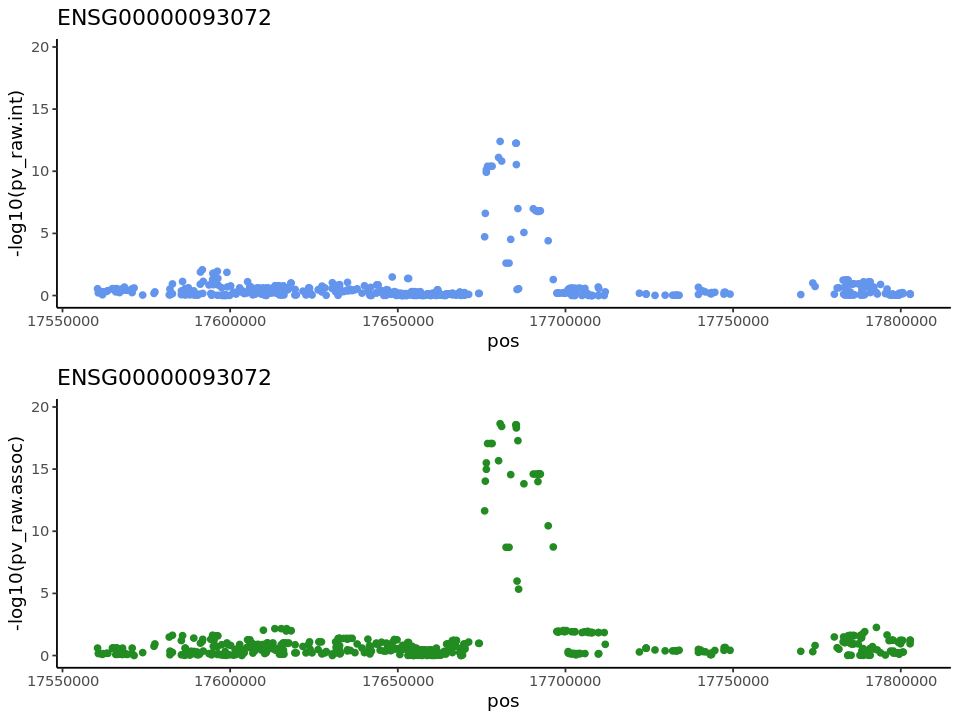

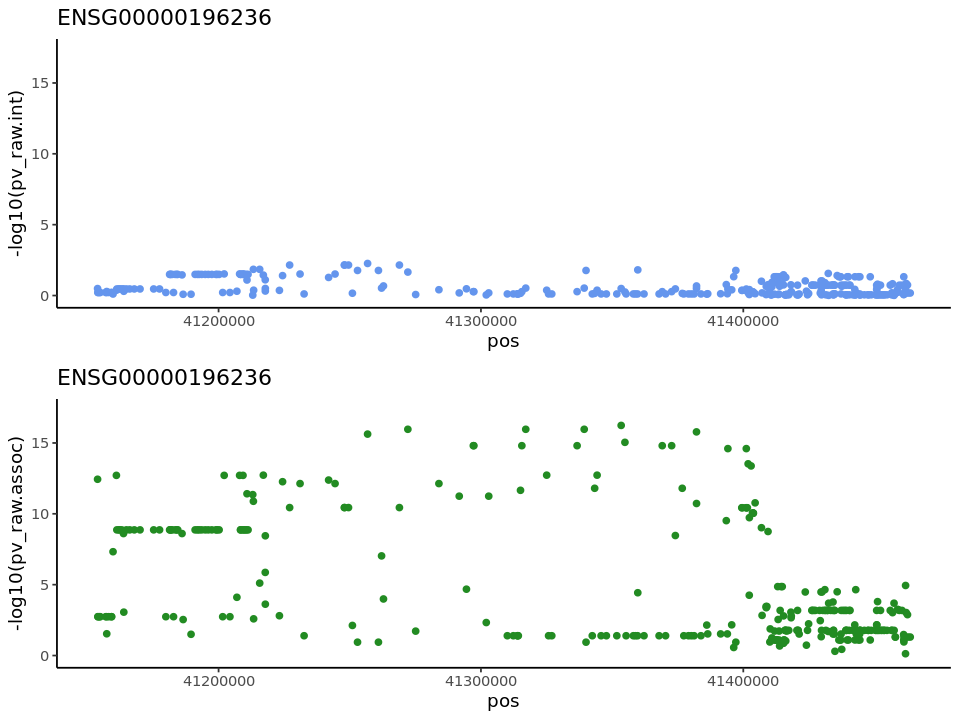

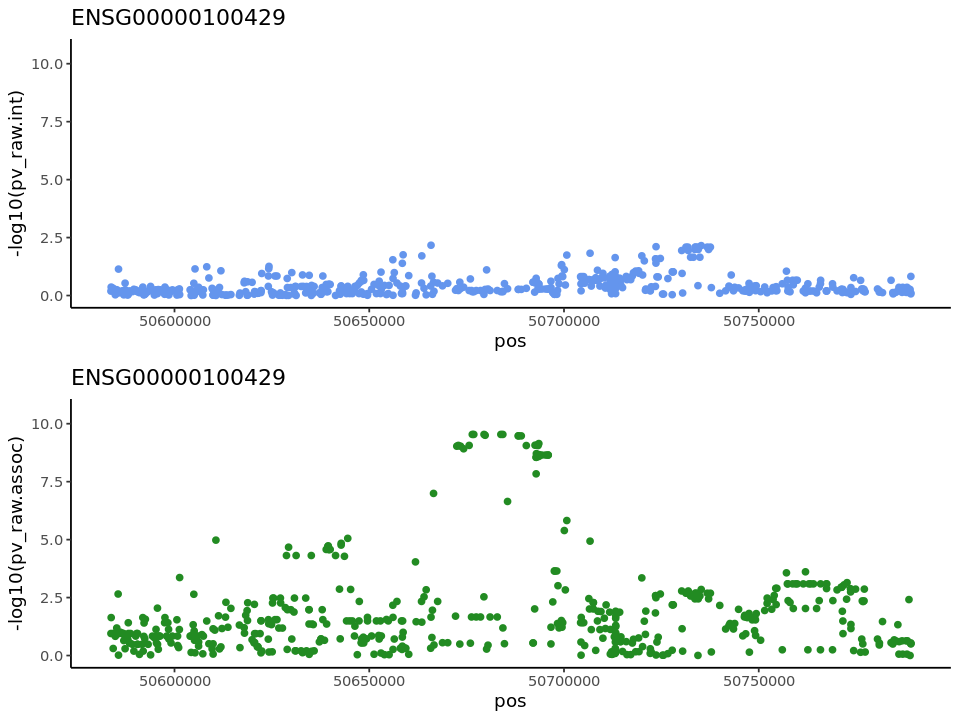

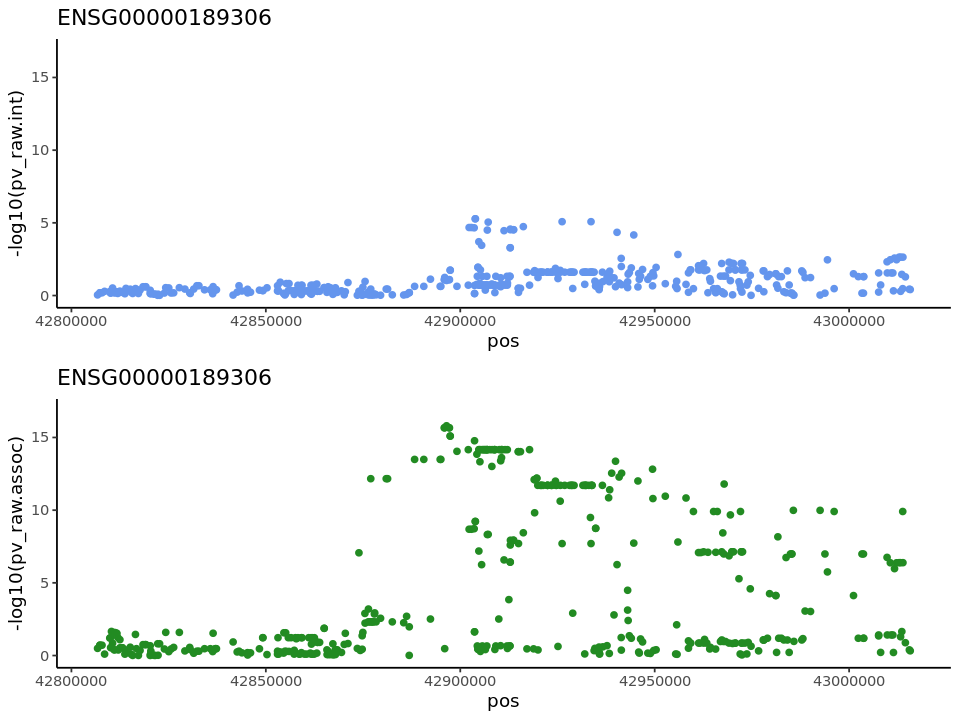

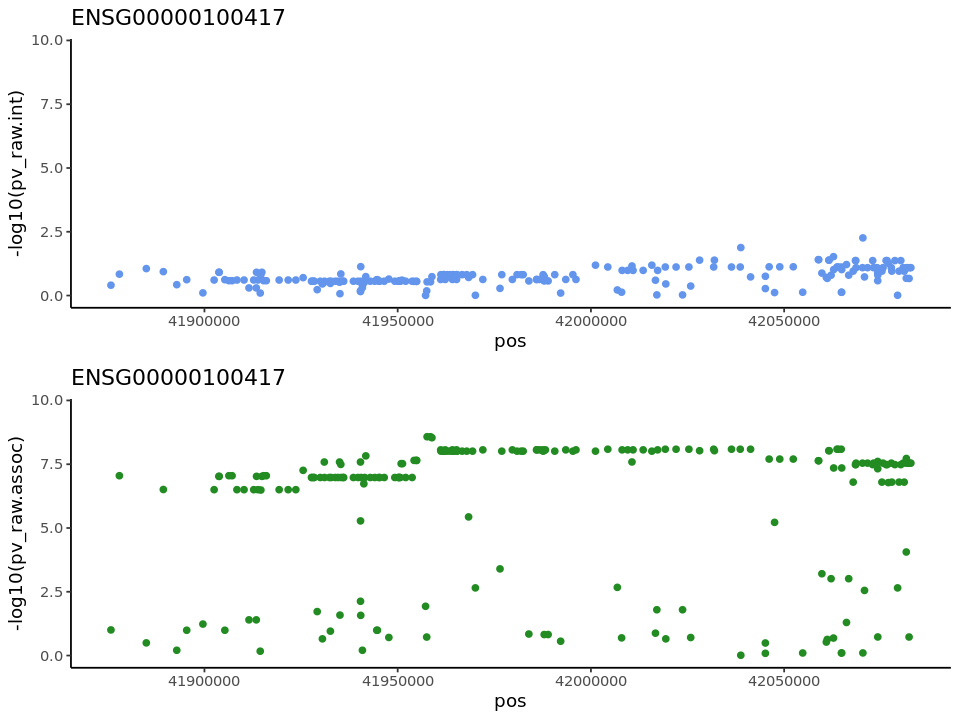

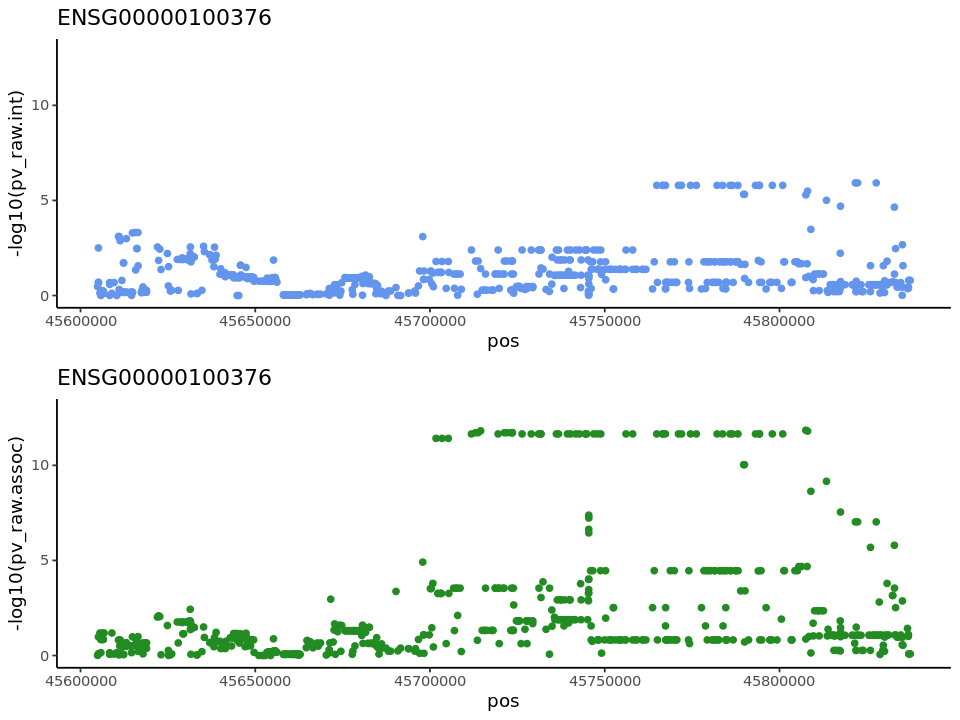

In [22]:
for (gene in genes){
    df = df_plot[df_plot$gene == gene,]
    p = ggplot(df, aes(x = pos, y = -log10(pv_raw.int))) + geom_point(col="cornflowerblue") 
    p1 = p + theme_classic() + ggtitle(gene)
    p = ggplot(df, aes(x = pos, y = -log10(pv_raw.assoc))) + geom_point(col="forestgreen") 
    p2 = p + theme_classic() + ggtitle(gene)
    m = -log10(min(min(df$pv_raw.int),min(df$pv_raw.assoc)))+1
    p1 = p1 + ylim(c(0,m))
    p2 = p2 + ylim(c(0,m))
    print(plot_grid(p1,p2,ncol=1))
}

In [23]:
## sign for both

In [24]:
genes = unique(as.character(df_plot[(-log10(df_plot$pv_raw.int)>4) & (-log10(df_plot$pv_raw.assoc)>4),"gene"]))
genes

[1] "ENSG00000184674" "ENSG00000179750" "ENSG00000093072" "ENSG00000183579"
 [5] "ENSG00000128394" "ENSG00000189306" "ENSG00000214076" "ENSG00000100058"
 [9] "ENSG00000100376" "ENSG00000133433" "ENSG00000099984"

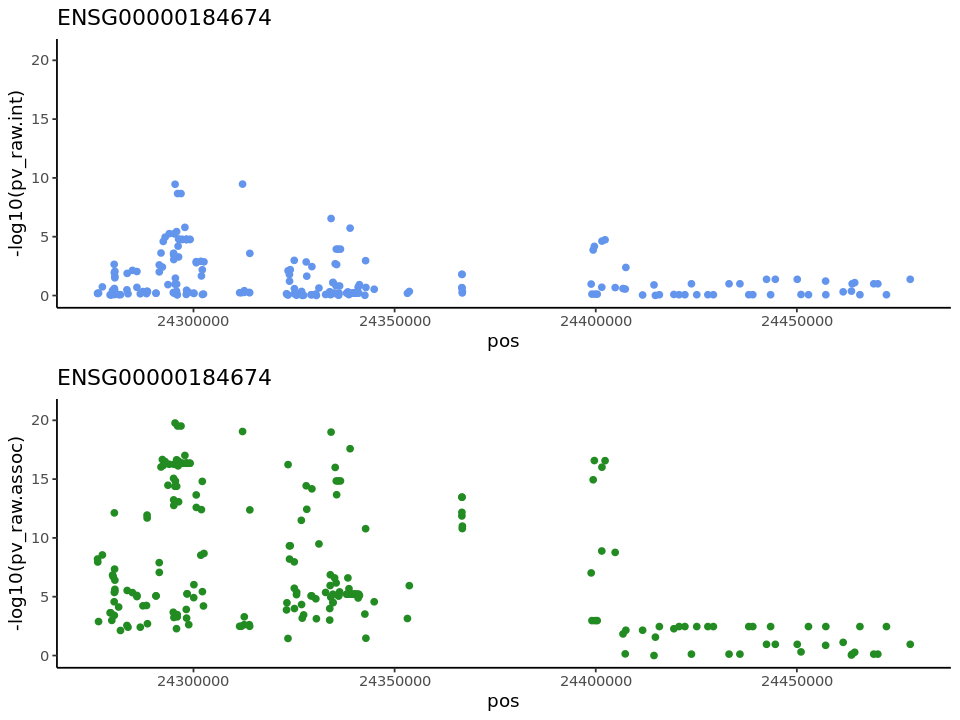

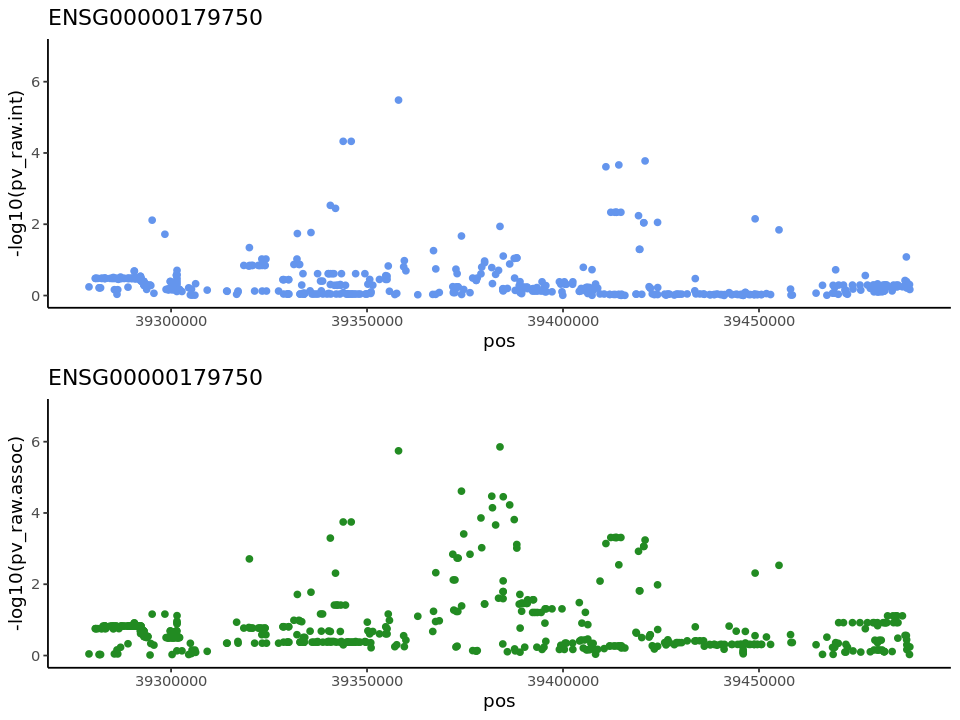

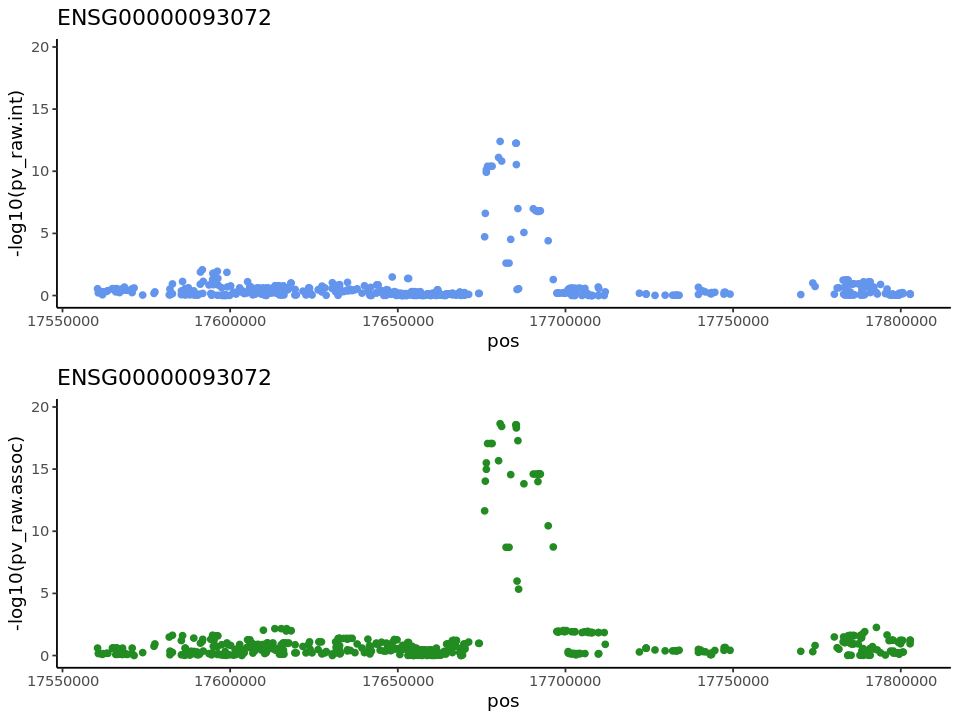

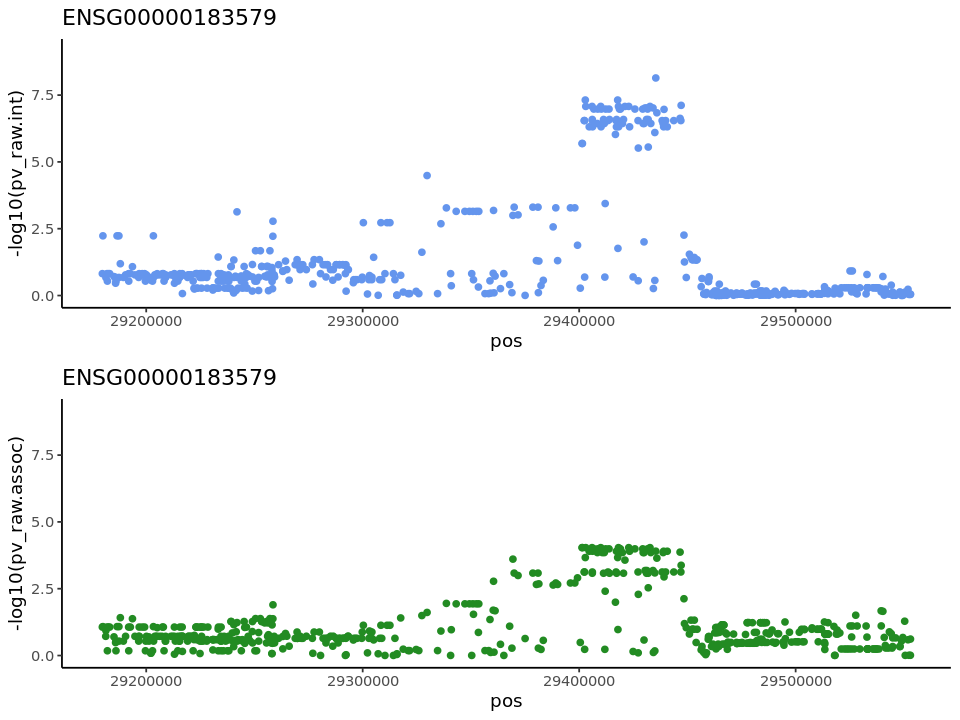

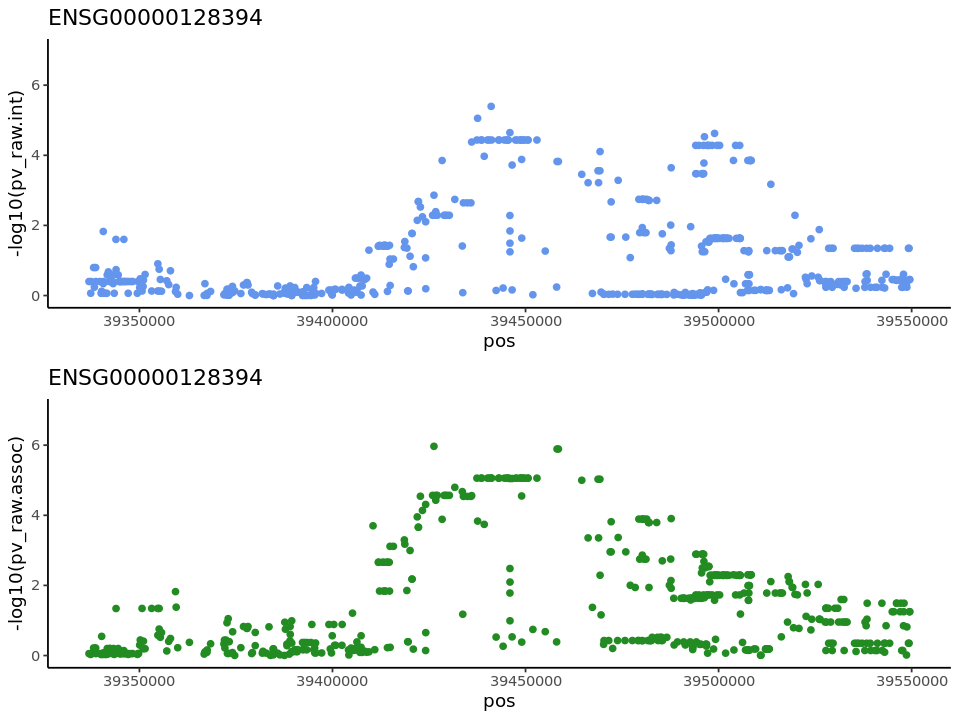

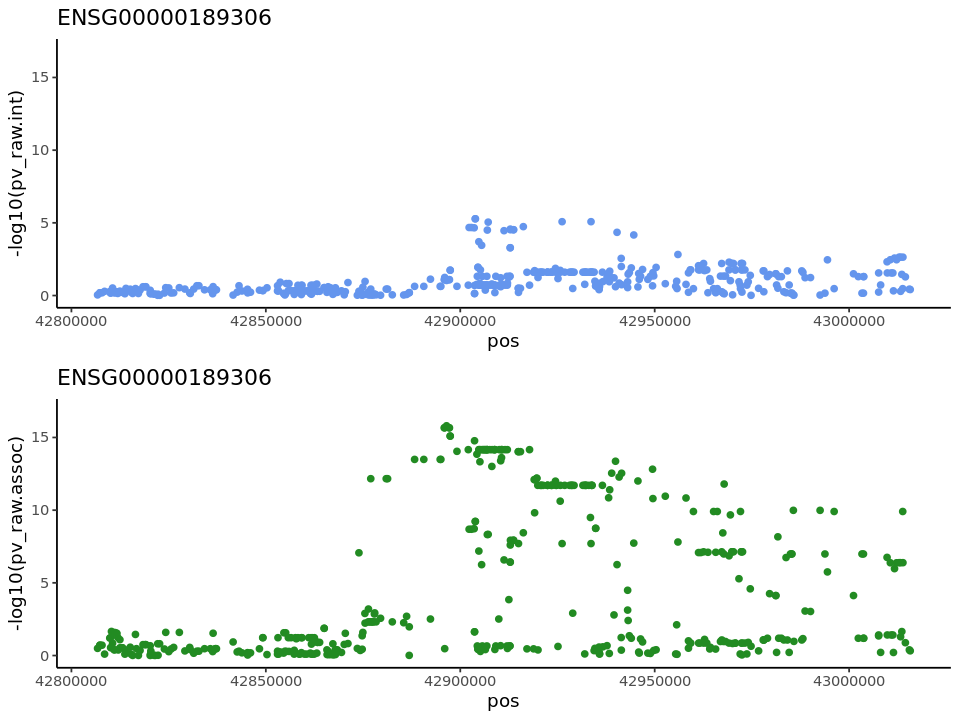

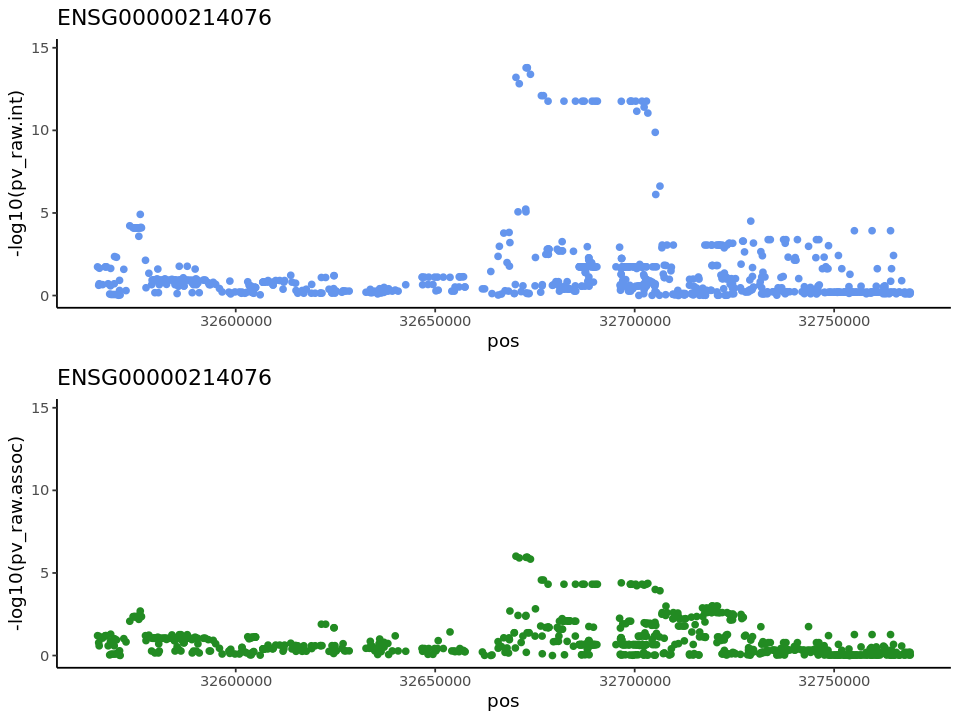

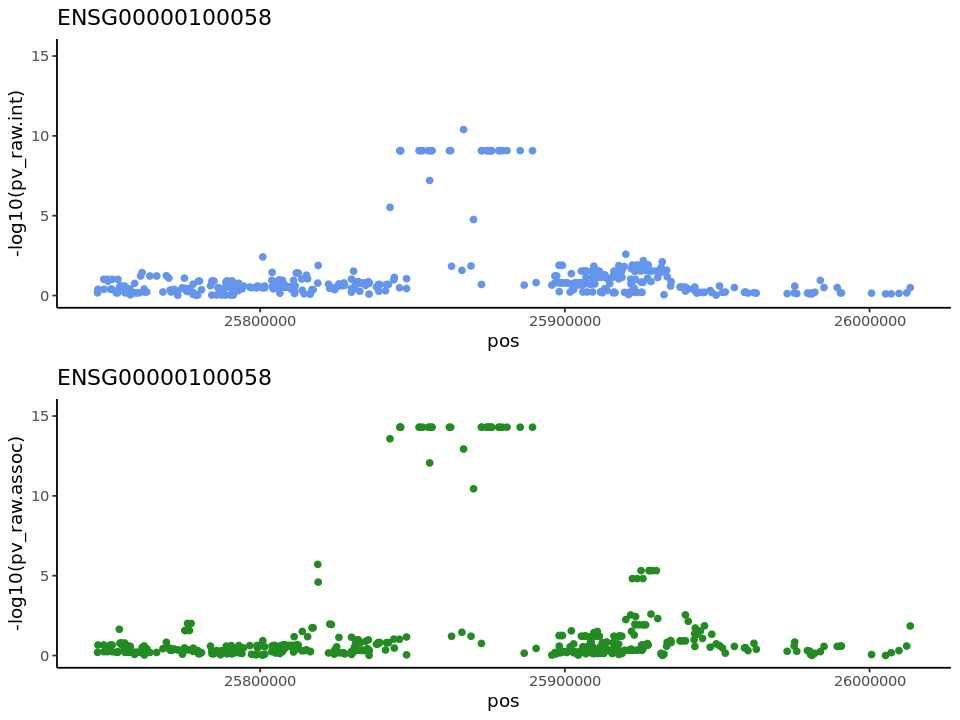

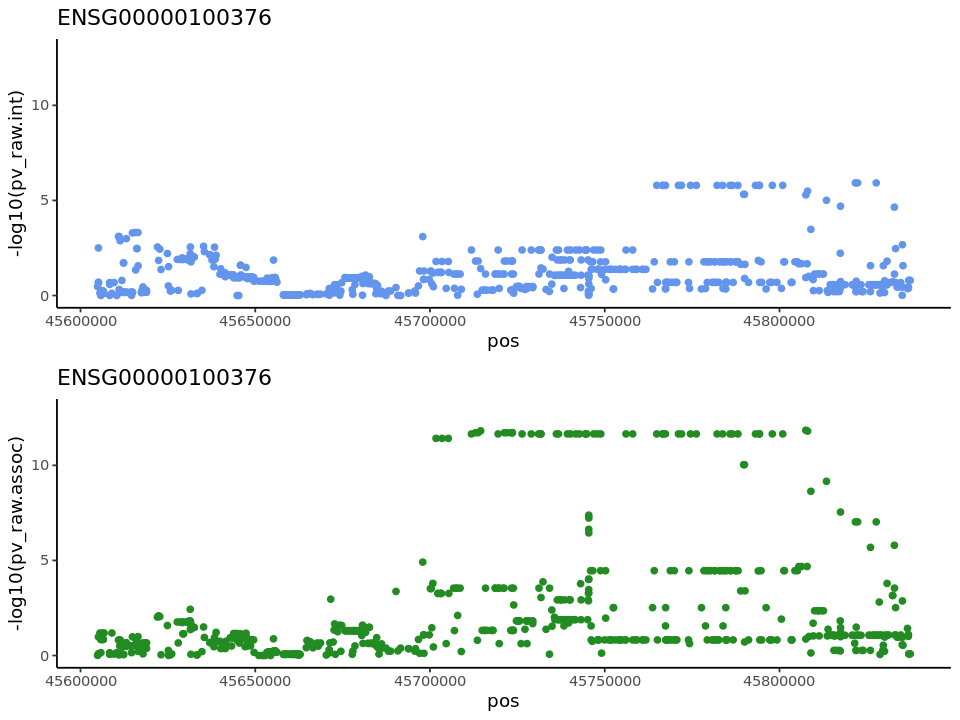

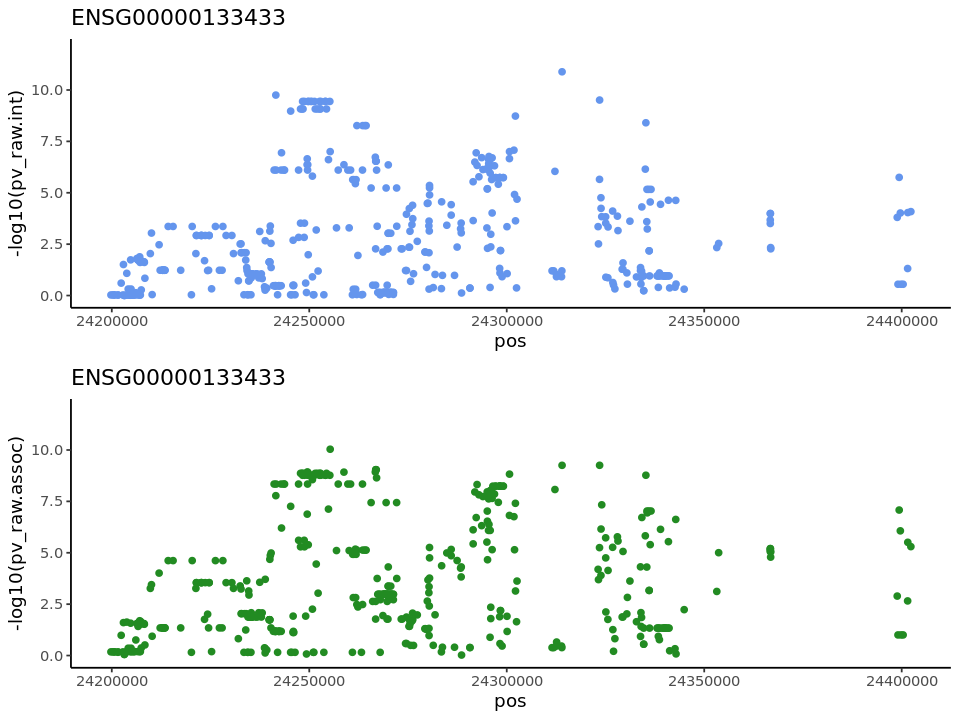

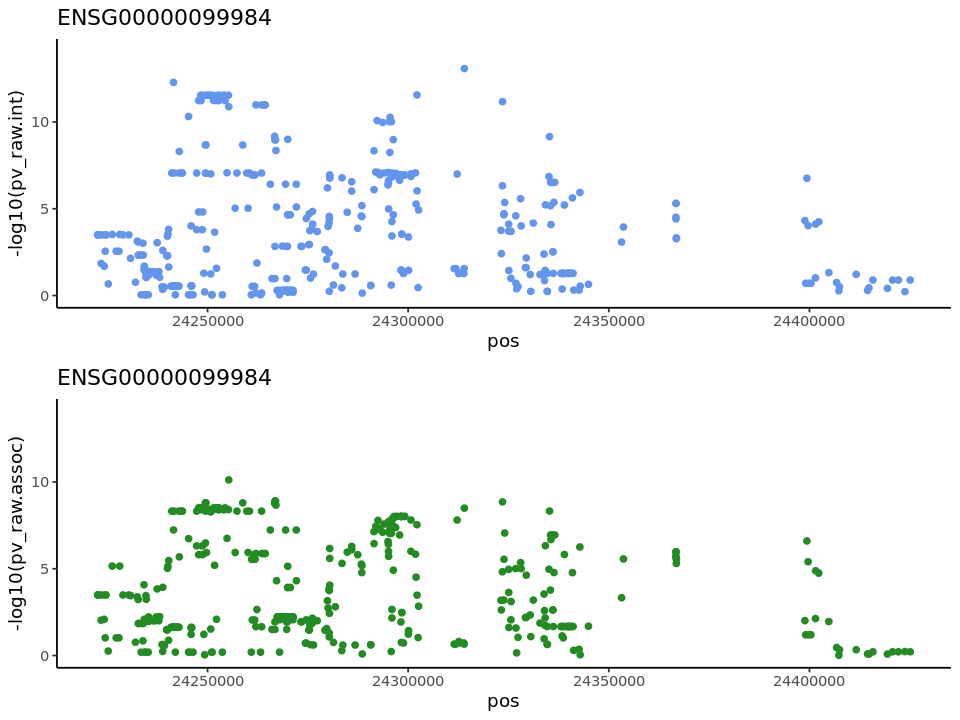

In [25]:
for (gene in genes){
    df = df_plot[df_plot$gene == gene,]
    p = ggplot(df, aes(x = pos, y = -log10(pv_raw.int))) + geom_point(col="cornflowerblue") 
    p1 = p + theme_classic() + ggtitle(gene)
    p = ggplot(df, aes(x = pos, y = -log10(pv_raw.assoc))) + geom_point(col="forestgreen") 
    p2 = p + theme_classic() + ggtitle(gene)
    m = -log10(min(min(df$pv_raw.int),min(df$pv_raw.assoc)))+1
    p1 = p1 + ylim(c(0,m))
    p2 = p2 + ylim(c(0,m))
    print(plot_grid(p1,p2,ncol=1))
}

In [26]:
######### (top association)

In [28]:
crm_22 = crm_assoc
head(crm_22)

gene            n_snps chrom pv_raw    snpID           pv
7476 ENSG00000100206 639    22    0.4846768 22_38815543_G_T 1 
7477 ENSG00000100206 639    22    0.5735132 22_38815767_C_T 1 
7478 ENSG00000100206 639    22    0.8756466 22_38816059_T_C 1 
7479 ENSG00000100206 639    22    0.1460246 22_38816351_G_A 1 
7480 ENSG00000100206 639    22    0.2546127 22_38817047_A_G 1 
7481 ENSG00000100206 639    22    0.1834585 22_38817105_C_T 1 
     eqtl                           
7476 ENSG00000100206-22_38815543_G_T
7477 ENSG00000100206-22_38815767_C_T
7478 ENSG00000100206-22_38816059_T_C
7479 ENSG00000100206-22_38816351_G_A
7480 ENSG00000100206-22_38817047_A_G
7481 ENSG00000100206-22_38817105_C_T

In [29]:
crm_22 = crm_22[order(crm_22$pv_raw),]
top_crm_22 = crm_22[-which(duplicated(crm_22$gene)),]
nrow(crm_22)
nrow(top_crm_22)

[1] 344480

[1] 644

In [30]:
df_plot1 = inner_join(top_crm_22, crm_int, by=c("snpID","gene"), suffix=c(".assoc",".int"))

In [31]:
cor.test(-log10(df_plot1$pv_raw.assoc),-log10(df_plot1$pv_raw.int))


	Pearson's product-moment correlation

data:  -log10(df_plot1$pv_raw.assoc) and -log10(df_plot1$pv_raw.int)
t = 11.338, df = 572, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3591331 0.4929381
sample estimates:
     cor 
0.428381 


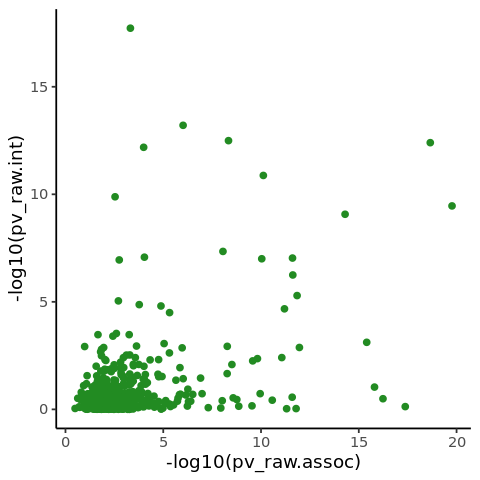

In [32]:
options(repr.plot.width = 4, repr.plot.height = 4)
p = ggplot(df_plot1, aes(x=-log10(pv_raw.assoc),y=-log10(pv_raw.int))) + geom_point(col="forestgreen")
p + theme_classic()

In [33]:
######### (top interaction)

In [34]:
crm_int = crm_int[order(crm_int$pv_raw),]
top_crm_int = crm_int[-which(duplicated(crm_int$gene)),]
nrow(crm_int)
nrow(top_crm_int)

[1] 306410

[1] 574

In [35]:
df_plot2 = inner_join(crm_22, top_crm_int, by=c("snpID","gene"), suffix=c(".assoc",".int"))

In [36]:
cor.test(-log10(df_plot2$pv_raw.assoc),-log10(df_plot2$pv_raw.int))


	Pearson's product-moment correlation

data:  -log10(df_plot2$pv_raw.assoc) and -log10(df_plot2$pv_raw.int)
t = 14.114, df = 572, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4449040 0.5665128
sample estimates:
      cor 
0.5082375 


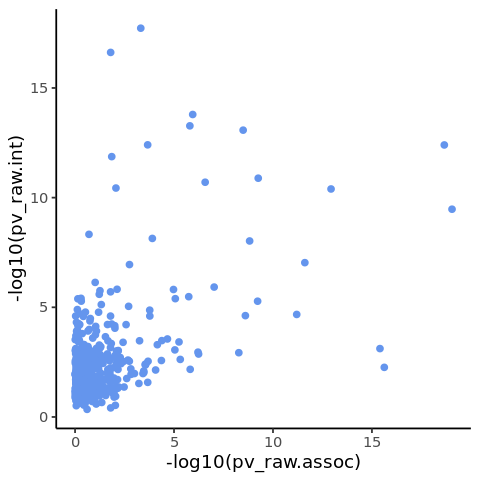

In [37]:
p = ggplot(df_plot2, aes(x=-log10(pv_raw.assoc),y=-log10(pv_raw.int))) + geom_point(col="cornflowerblue")
p + theme_classic()